# Part A) Motivation
## Why did you choose this final project?
- What interested you about it?

I am interested in studying this project from real research, and the dataframe processing and summary statistics are very useful for me to learn how to use pandas and numpy. I am also interested in the data visualization part, which is very useful for me to learn how to use matplotlib and seaborn in my future research.

- Was it the application in particular?

No, I am mainly interested in the process of data analysis and visualization.

- Was it the aspects of the data – e.g. regression/classification, data size, etc…

Kind of. The data input type and output type could be related with machine learning input and output, which could be useful for future studies.

## How interested are you in this project?
- Could you not decide between two of the listed projects?

Yes, I was also interested in Calibrating Additive Manufacturing (AM) Simulations, which also studies about time series input data.

## Answer this question after going through Parts B), C), D):
- After exploring the data and working through how you would model the data in more detail, would you prefer to work on a different project?

No, I am still interested in this project. It serves as a start point for me to learn how to use pandas, numpy, matplotlib and seaborn in a research project data analysis.

- Do you find this application not interesting? Is it confusing? Is the application just not something you want to work on?

No, I am still interested in this project and it is clear. 


# Part B)  Predictive modeling discussion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df_in = pd.read_csv('./trial_inputs.csv')
df_out = pd.read_csv('./trial_outputs.csv')

df_output_max_cycle = df_out.groupby('trial_id').last().reset_index()

df_trial = pd.concat([df_in,df_output_max_cycle[['cycle','y']]],axis=1)

In [2]:
df_trial

,trial_id,x1,x2,x3,x4,x5,x6,cycle,y
0,1,-1,-1,-1,-1,0,A,39,0.000263
1,2,1,-1,-1,-1,0,A,52,0.000279
2,3,-1,1,-1,-1,0,A,38,0.000266
3,4,1,1,-1,-1,0,A,50,0.000287
4,5,-1,0,-1,-1,-1,A,40,0.000268
...,...,...,...,...,...,...,...,...,...
235,236,0,-1,1,1,1,D,100,0.000301
236,237,0,1,1,1,1,D,83,0.000262
237,238,0,0,1,1,0,D,100,0.000345
238,239,0,0,1,1,0,D,100,0.000345


## Do not state the specific models you will use, but you MUST state:
- If you are working on a REGRESSION or CLASSIFICATION problem.

CLASSIFICATION problem. We need to predict the whether the output cycle could reach 100 or not. 

- Which variables are inputs?

Variables x1 to x6 are inputs.


- Which variables are responses/outputs/outcomes/targets?

Variables cycle and y are outputs.

- Did you need to DERIVE the responses of interest by SUMMARIZING the available data?
Yes. I need to extract the max cycle of each trials and concat this result with the input data.

- If so, what summary actions did you perform?
I grouped the data by trial_id and extracted the max cycle of each trial.


- Which variables are identifiers and should NOT be used in the models?
 
Variable trial_id is identifier and should not be used in the models.

## After completing Parts C) and D): Discuss which of the inputs you think influence the response based on your exploratory visualizations.
- Describe which exploratory visualization helped you identify potential input-to- output relationships.
- If you are not sure which inputs seem to influence the response, it is ok to say so.


# Part C) Exploratory Data Analysis – general requirements
- If you are working on a CLASSIFICATION problem, you must:
    - Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values.
    - Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values.
    - Visualize the counts of combinations between the response (outcome) and categorical inputs.




## You must perform the ESSENTIAL exploration activities:

In [3]:

## Display the number of rows and columns
print(df_in.shape)
print(df_out.shape)
print(df_trial.shape)


(240, 7)
(17431, 3)
(240, 9)


In [4]:
## Display the columns names and their associated data types
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trial_id  240 non-null    int64 
 1   x1        240 non-null    int64 
 2   x2        240 non-null    int64 
 3   x3        240 non-null    int64 
 4   x4        240 non-null    int64 
 5   x5        240 non-null    int64 
 6   x6        240 non-null    object
dtypes: int64(6), object(1)
memory usage: 13.2+ KB


In [5]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17431 entries, 0 to 17430
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trial_id  17431 non-null  int64  
 1   cycle     17431 non-null  int64  
 2   y         17431 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 408.7 KB


In [6]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trial_id  240 non-null    int64  
 1   x1        240 non-null    int64  
 2   x2        240 non-null    int64  
 3   x3        240 non-null    int64  
 4   x4        240 non-null    int64  
 5   x5        240 non-null    int64  
 6   x6        240 non-null    object 
 7   cycle     240 non-null    int64  
 8   y         240 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 17.0+ KB


In [7]:
## Display the number of missing values for each column
df_in.isnull().sum()

trial_id    0
x1          0
x2          0
x3          0
x4          0
x5          0
x6          0
dtype: int64

In [8]:
df_out.isnull().sum()

trial_id    0
cycle       0
y           0
dtype: int64

In [9]:
## Display the number of unique values for each column
df_in.nunique()

trial_id    240
x1            3
x2            3
x3            2
x4            2
x5            3
x6            4
dtype: int64

In [10]:
df_out.nunique()

trial_id      240
cycle         100
y           17431
dtype: int64

## You must state if you want to effectively treat a numeric column as a non-numeric for exploration purposes.

Yes, I would treat -1, 0, 1 as non-numeric for exploration purposes.I would also treat the cycle number as non-numeric for exploration purposes.

## You must visualize the MARGINAL distributions for ALL variables in your data.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


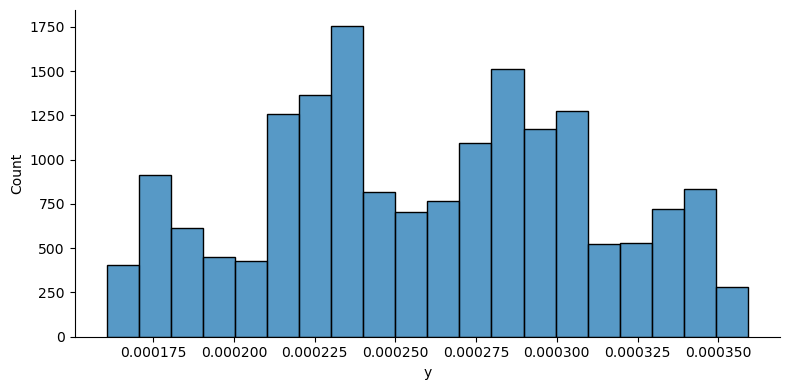

In [11]:
## Continuous variables: Histograms or Density plots
### for df_out

sns.displot(data = df_out, x = 'y', kind='hist', bins=20, height=4, aspect=2)

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

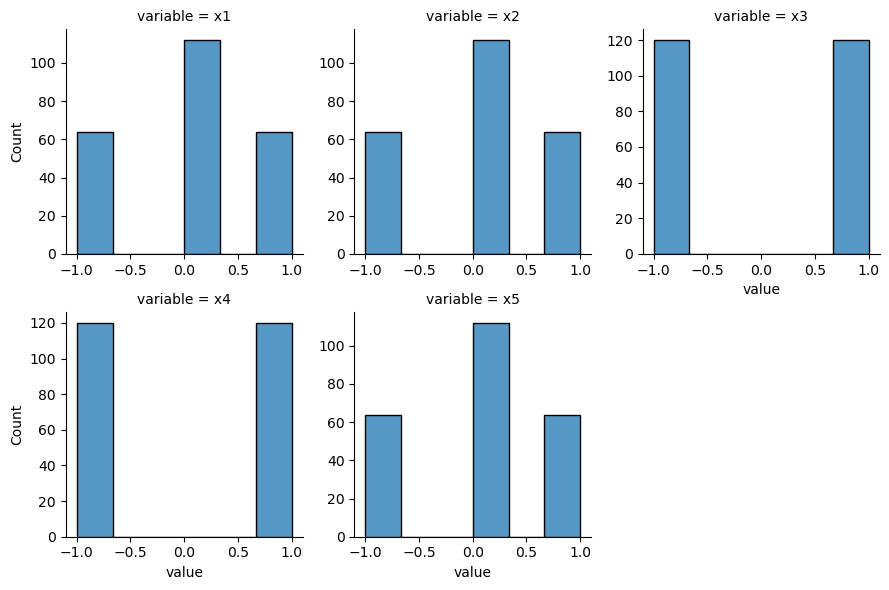

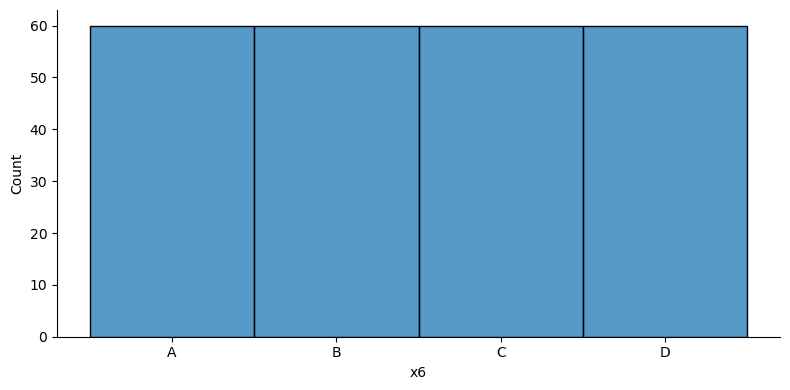

In [12]:
## Categorical variables: Bar charts
### wide to long

## for df_in 
df_in_lf = df_in.reset_index().\
rename(columns={'index':'id'}).\
melt(id_vars=['id','trial_id','x6'], value_vars=df_in.columns.tolist())

sns.displot(data=df_in_lf, x='value', col='variable', kind='hist', 
            facet_kws={'sharex':False,'sharey':False},
            col_wrap=3,height=3,aspect=1,
            bins = 6)

sns.displot(data = df_in, x='x6', kind='hist', bins=6, height=4, aspect=2)


c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


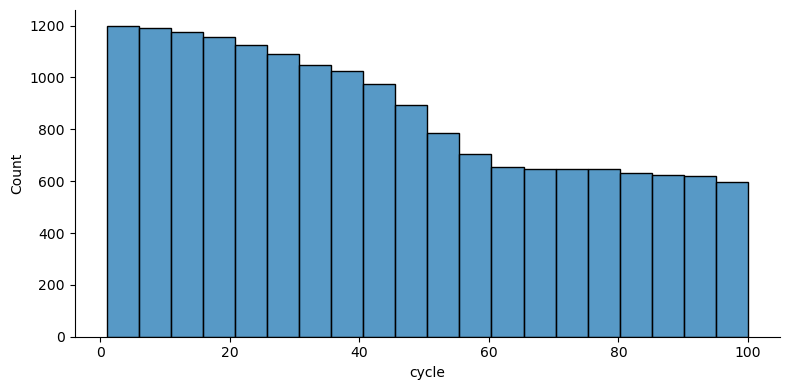

In [13]:
## for df_out

sns.displot(data = df_out, x='cycle', kind='hist', bins=20, height=4, aspect=2)

## You must decide appropriate visualizations to show:

We would like to use to concated dataframe to visualize the marginal distributions for all variables in the data.

The combination of data input containing x1 to x6.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

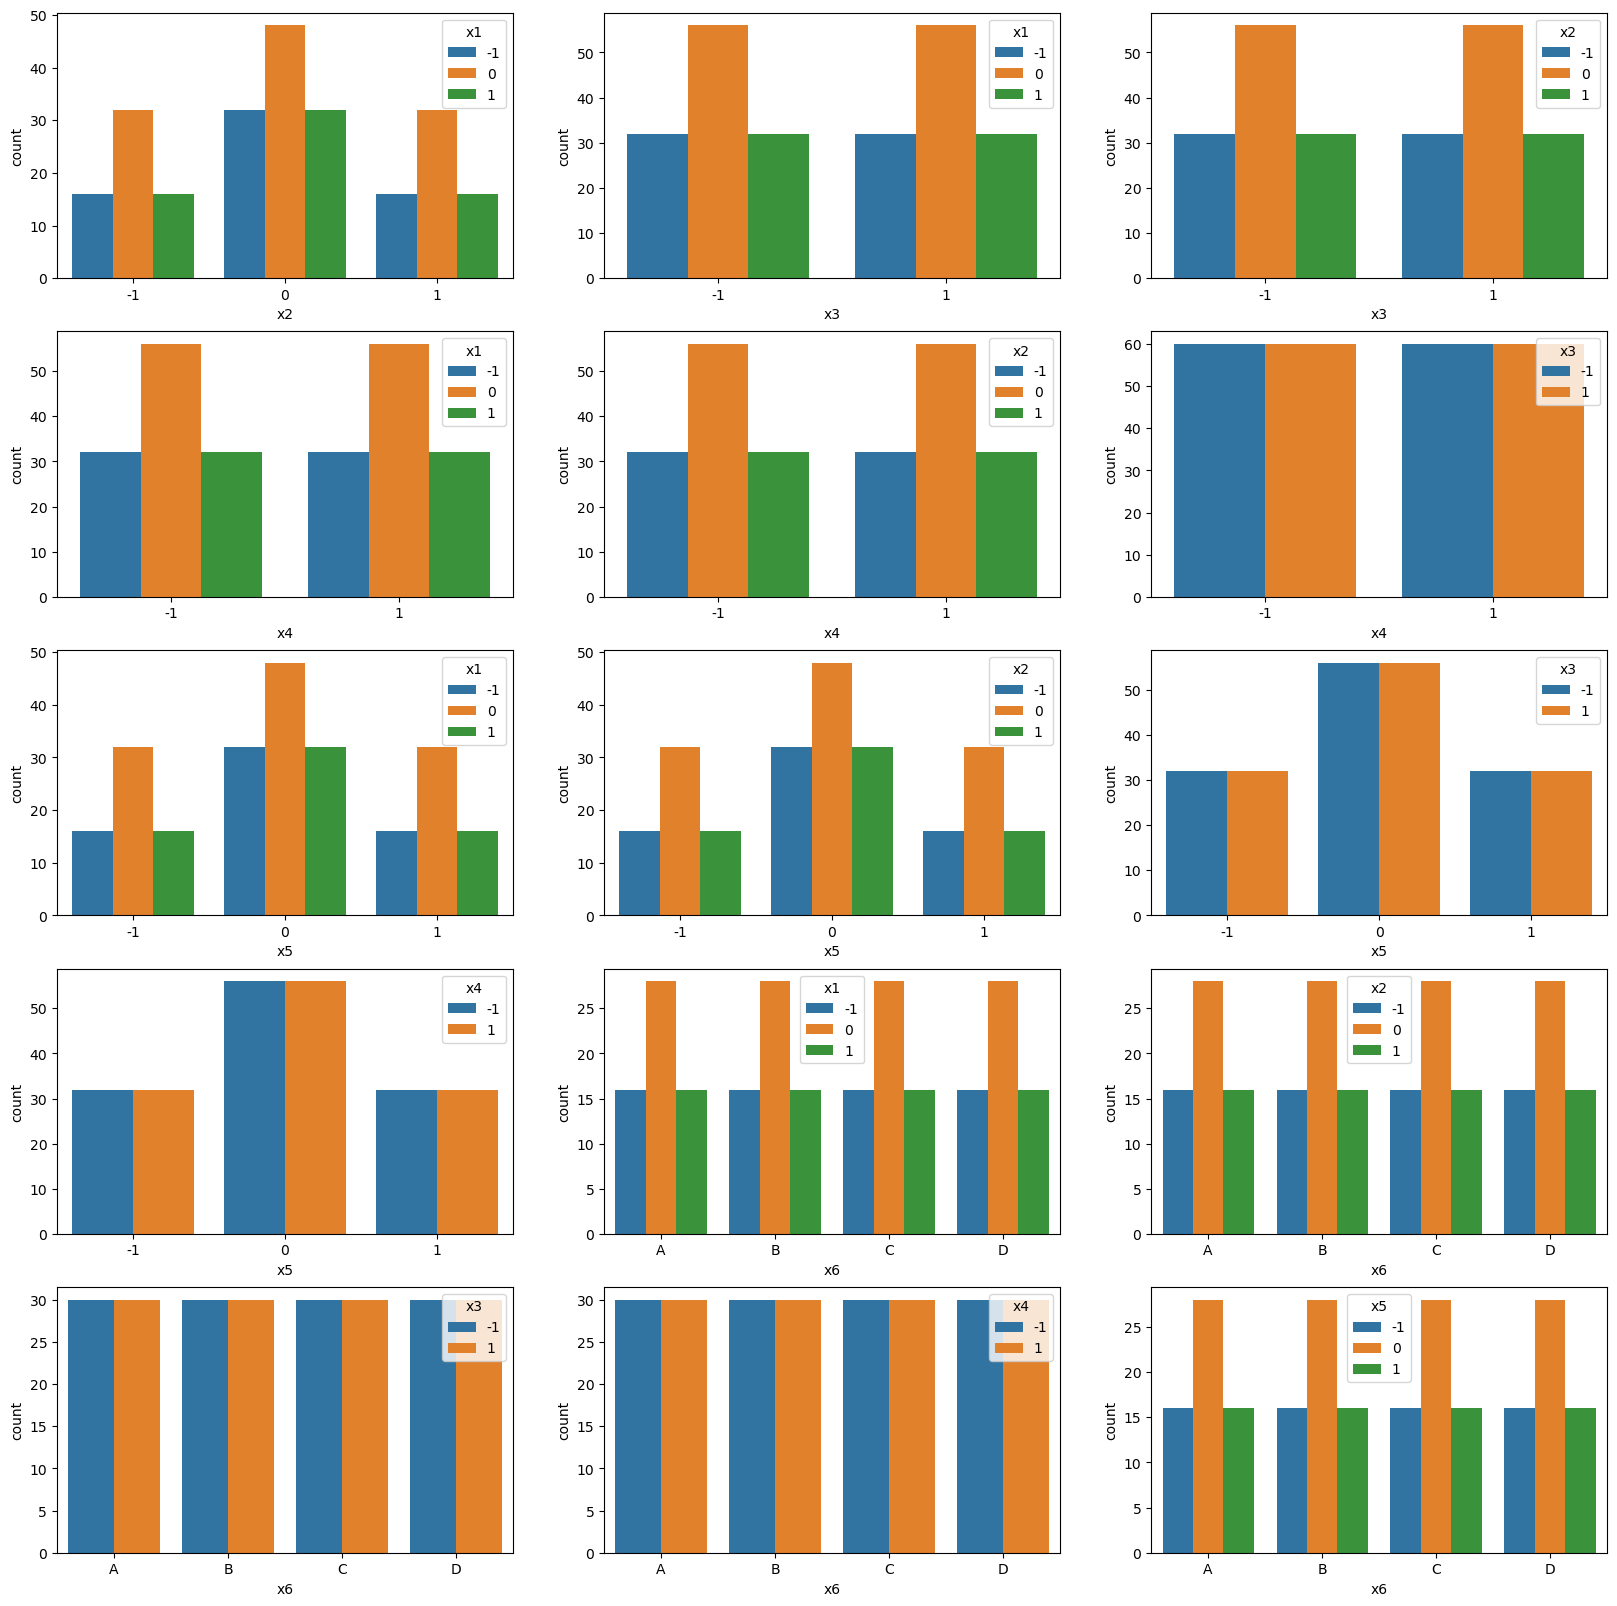

In [14]:
## Categorical-to-categorical relationships (COMBINATIONS)
# count plot between any 2 variables in df_trial

fig, ax = plt.subplots(5,3,figsize=(20,20))

df_in_categorical_name_list = ['x1','x2','x3','x4','x5','x6']

combination_list = [ (i,j) for i in df_in_categorical_name_list for j in df_in_categorical_name_list if i > j]

for combination in combination_list:
    sns.countplot(data=df_trial, x=combination[0], hue=combination[1], ax=ax[combination_list.index(combination)//3][combination_list.index(combination)%3])


c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

Text(0.5, 0, 'x6')

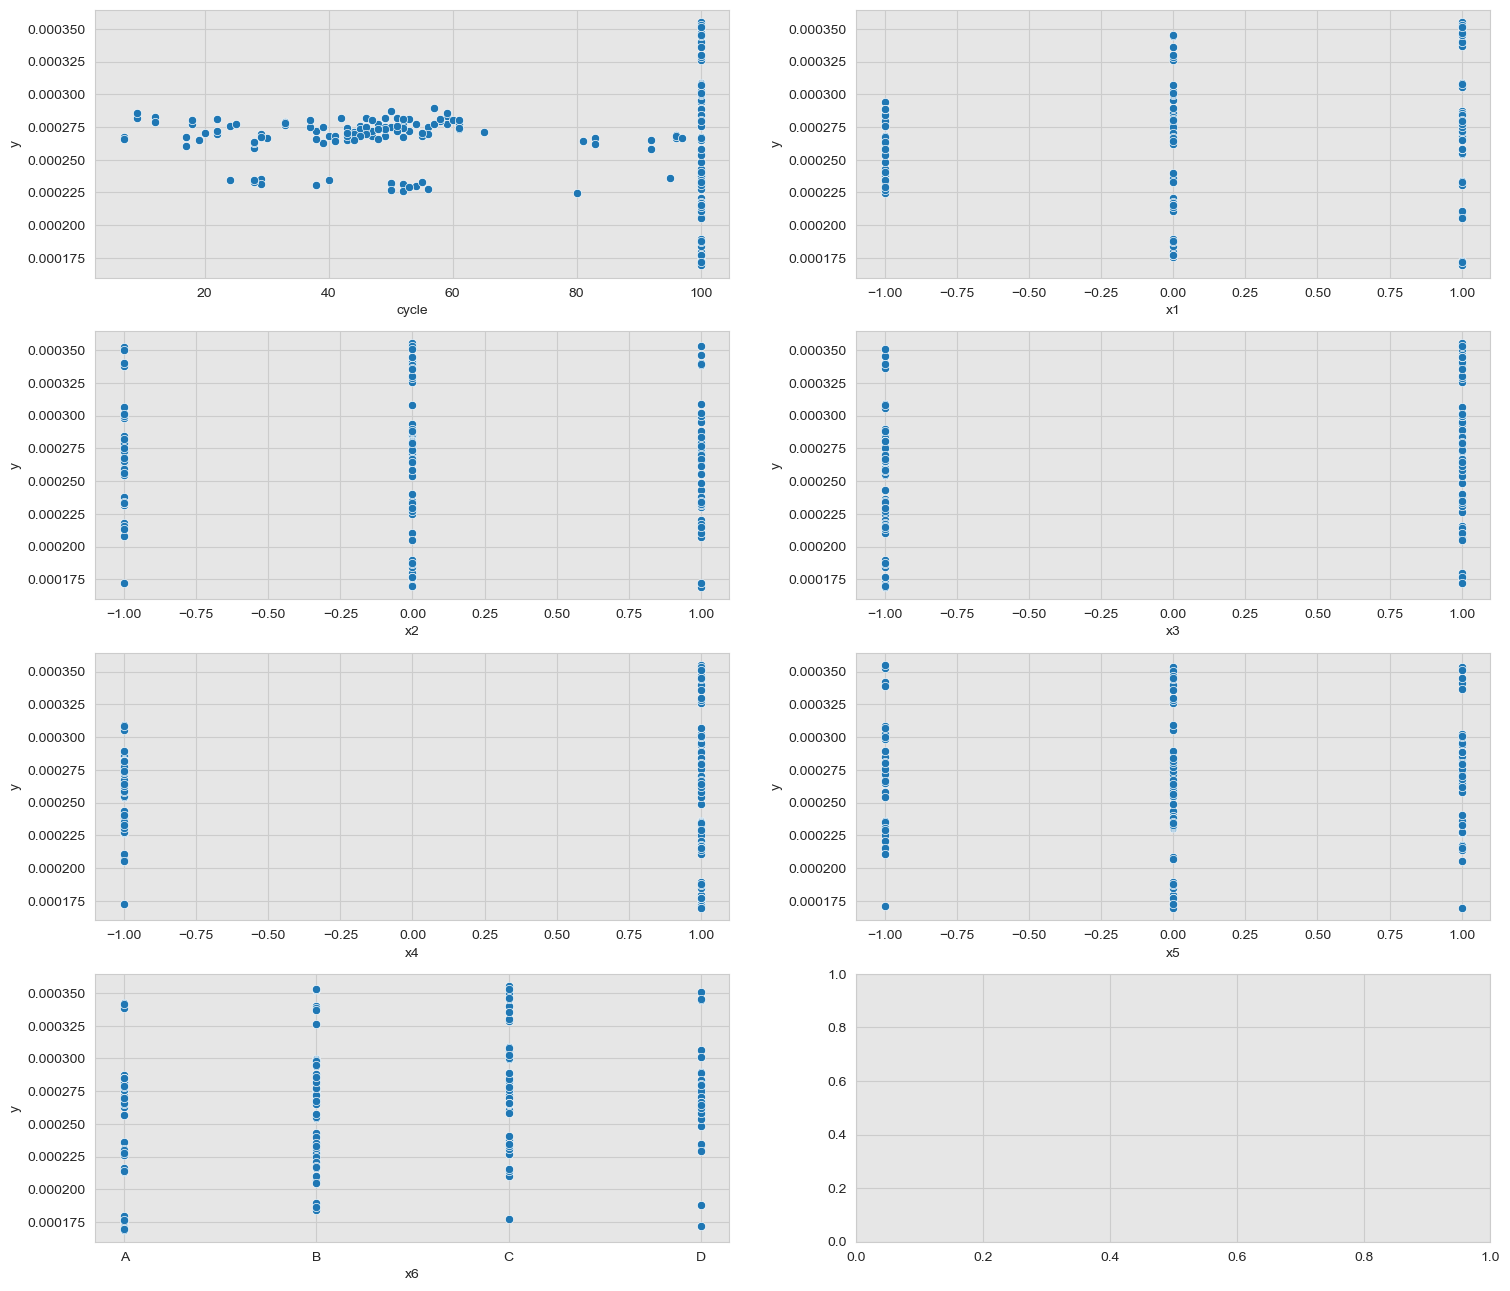

In [15]:
## Categorical-to-continuous relationships
df_trial_copy = df_trial.copy()
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})


fig, axs = plt.subplots(4,2,figsize=(18,16),sharex=False,sharey=False)
sns.scatterplot(data=df_trial_copy, x = 'cycle', y = 'y',ax=axs[0,0])
axs[0,0].set_xlabel('cycle')

sns.scatterplot(data=df_trial_copy, x = 'x1', y = 'y',ax=axs[0,1])
axs[0,1].set_xlabel('x1')

sns.scatterplot(data=df_trial_copy, x = 'x2', y = 'y',ax=axs[1,0])
axs[1,0].set_xlabel('x2') 

sns.scatterplot(data=df_trial_copy, x = 'x3', y = 'y',ax=axs[1,1])
axs[1,1].set_xlabel('x3')

sns.scatterplot(data=df_trial_copy, x = 'x4', y = 'y',ax=axs[2,0])
axs[2,0].set_xlabel('x4')

sns.scatterplot(data=df_trial_copy, x = 'x5', y = 'y',ax=axs[2,1])
axs[2,1].set_xlabel('x5')

sns.scatterplot(data=df_trial_copy, x = 'x6', y = 'y',ax=axs[3,0])
axs[3,0].set_xlabel('x6')



In [16]:
## Continuous-to-continuous relationships

# There is only one continous variable

- You must decide appropriate visualizations to show if RELATIONSHIPS change across GROUPS.
    - This is especially important to continuous-to-continuous relationships.
    - Do not forget though that categorical-to-continuous relationships can also be GROUPED BY a secondary categorical variable!

We don't have two continuous variables. We focused on the relationship between categorical and categorical variables in the input, as well as the max cycle number. We also focused on the relationship between categorical variables and the continuous variable y.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

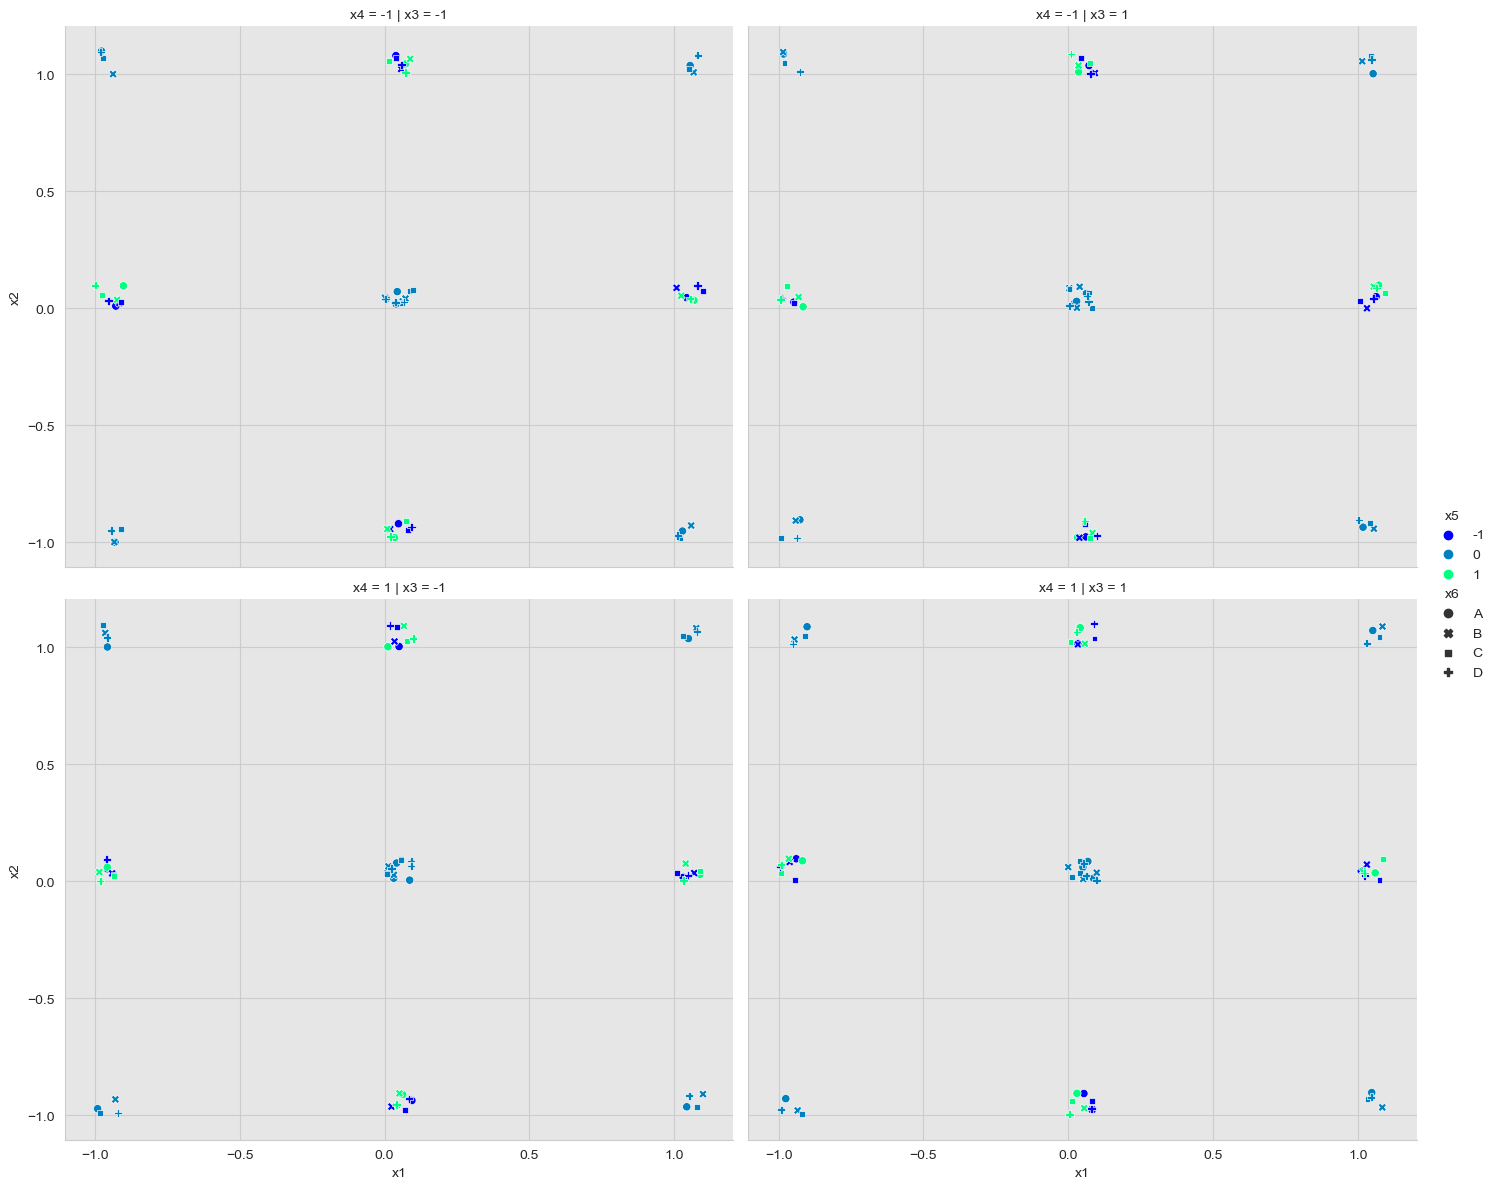

In [17]:
df_in_copy = df_in.copy()

# ## plot
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
np.random.seed(123)

df_in_copy.x1 = df_in.x1 + np.random.rand(df_in.x1.shape[0])/10
df_in_copy.x2 = df_in.x2 + np.random.rand(df_in.x2.shape[0])/10

# 5 variables from x1 to x6
sns.relplot(data=df_in_copy, x='x1', y='x2', col='x3', row='x4', hue='x5', style='x6', kind='scatter', height=6, aspect=1.2, palette='winter')

The combination of x1 to x6 influence on max cycle number

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

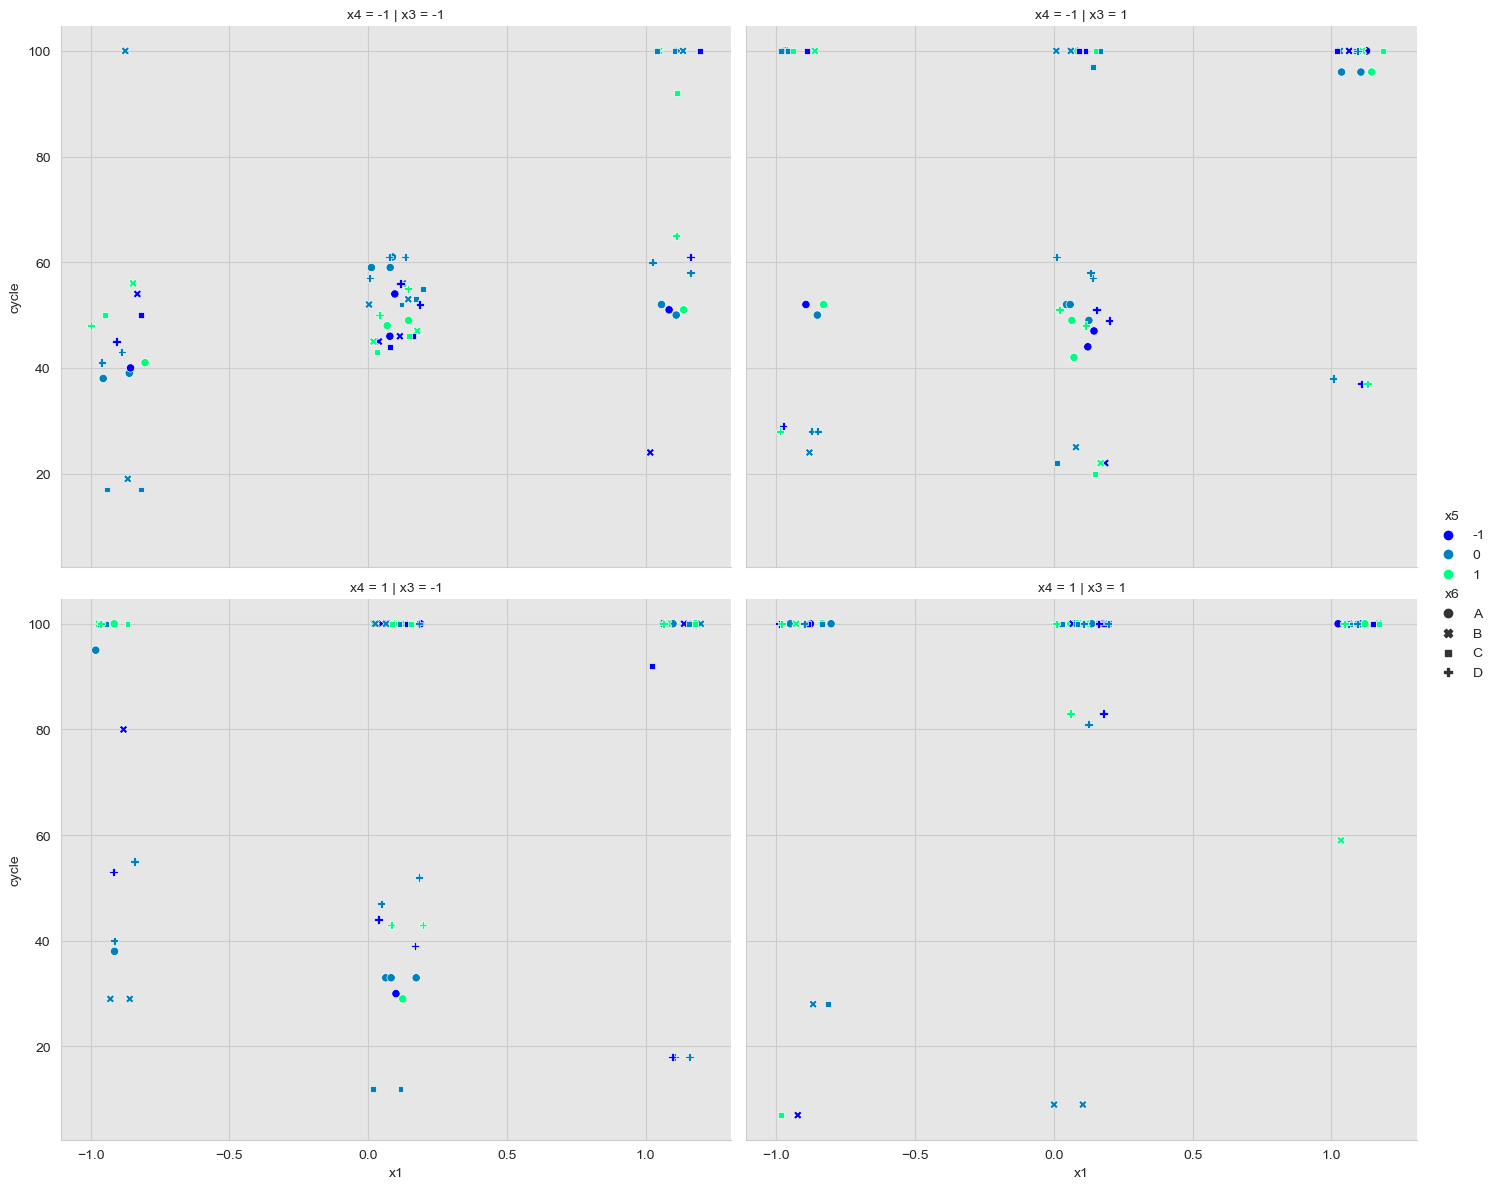

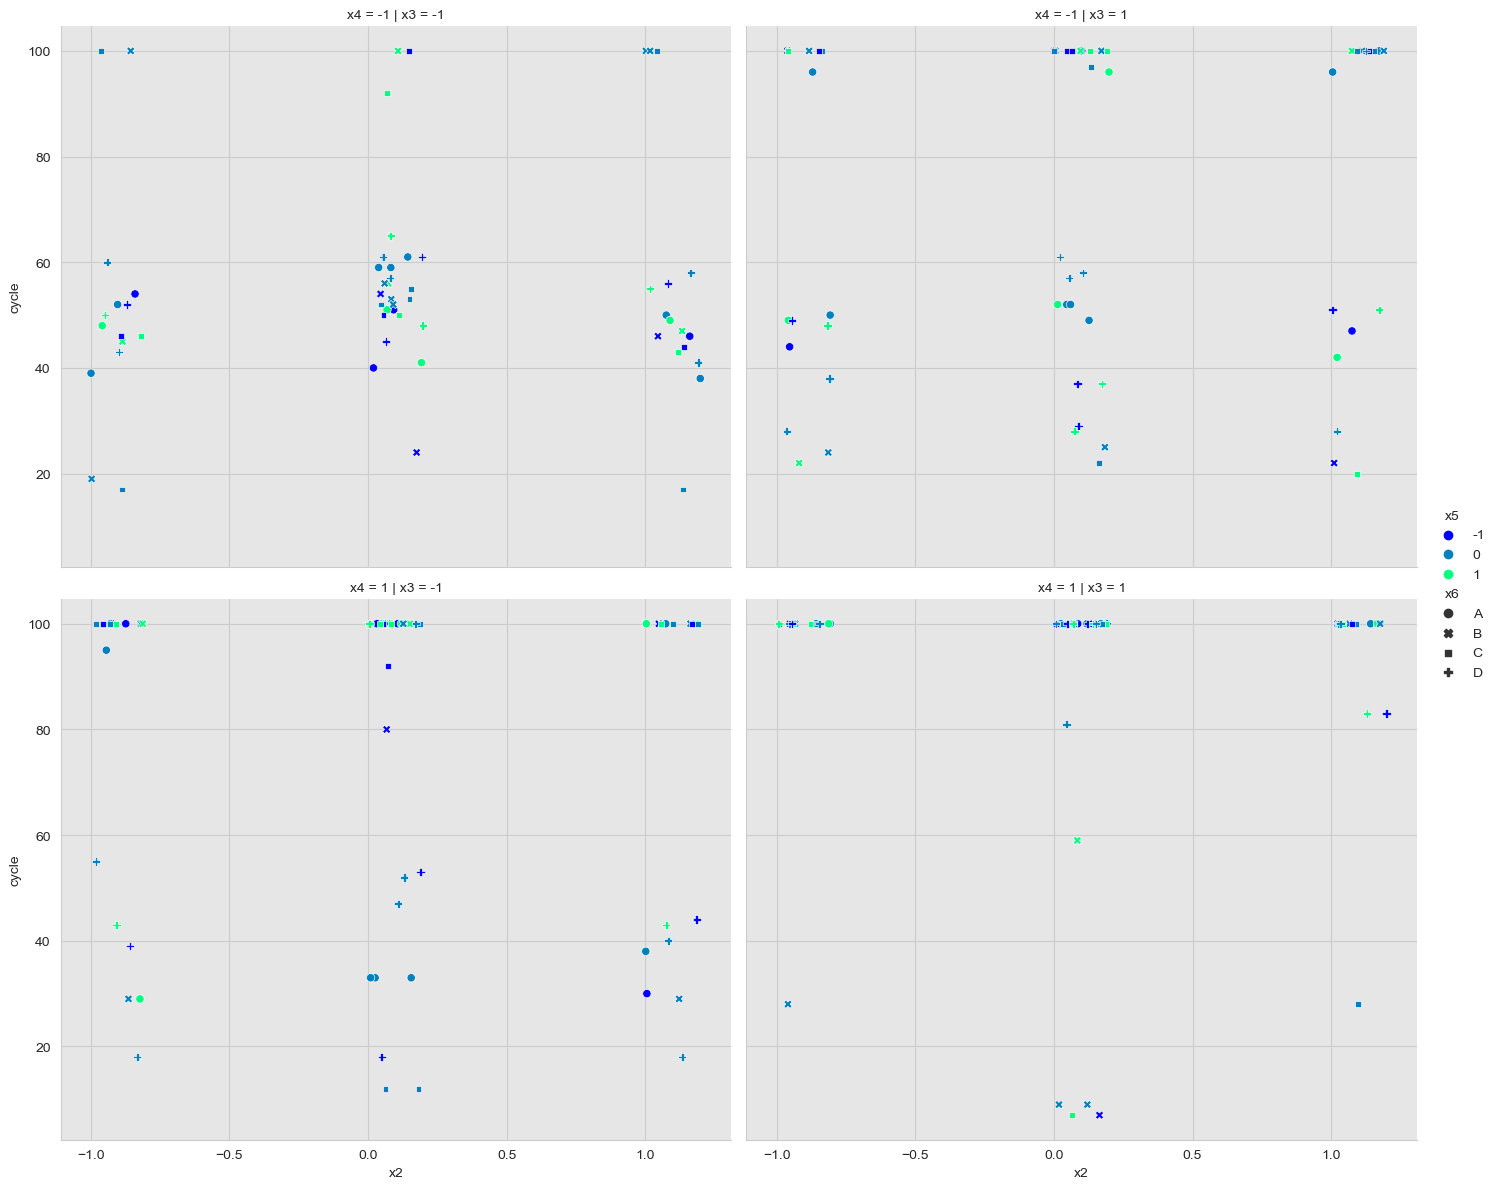

In [18]:
df_trial_copy = df_trial.copy()

# ## plot
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
np.random.seed(123)

df_trial_copy.x1 = df_trial.x1 + np.random.rand(df_trial.x1.shape[0])/5
df_trial_copy.x2 = df_trial.x2 + np.random.rand(df_trial.x2.shape[0])/5

# 5 variables from x1 to x6
sns.relplot(data=df_trial_copy, x='x1', y='cycle', col='x3', row='x4', hue='x5', style='x6', kind='scatter', height=6, aspect=1.2, palette='winter')
sns.relplot(data=df_trial_copy, x='x2', y='cycle', col='x3', row='x4', hue='x5', style='x6', kind='scatter', height=6, aspect=1.2, palette='winter')


It is really interesting to find out when x1 is 0, they max cycle mainly focused around 40 to 60.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

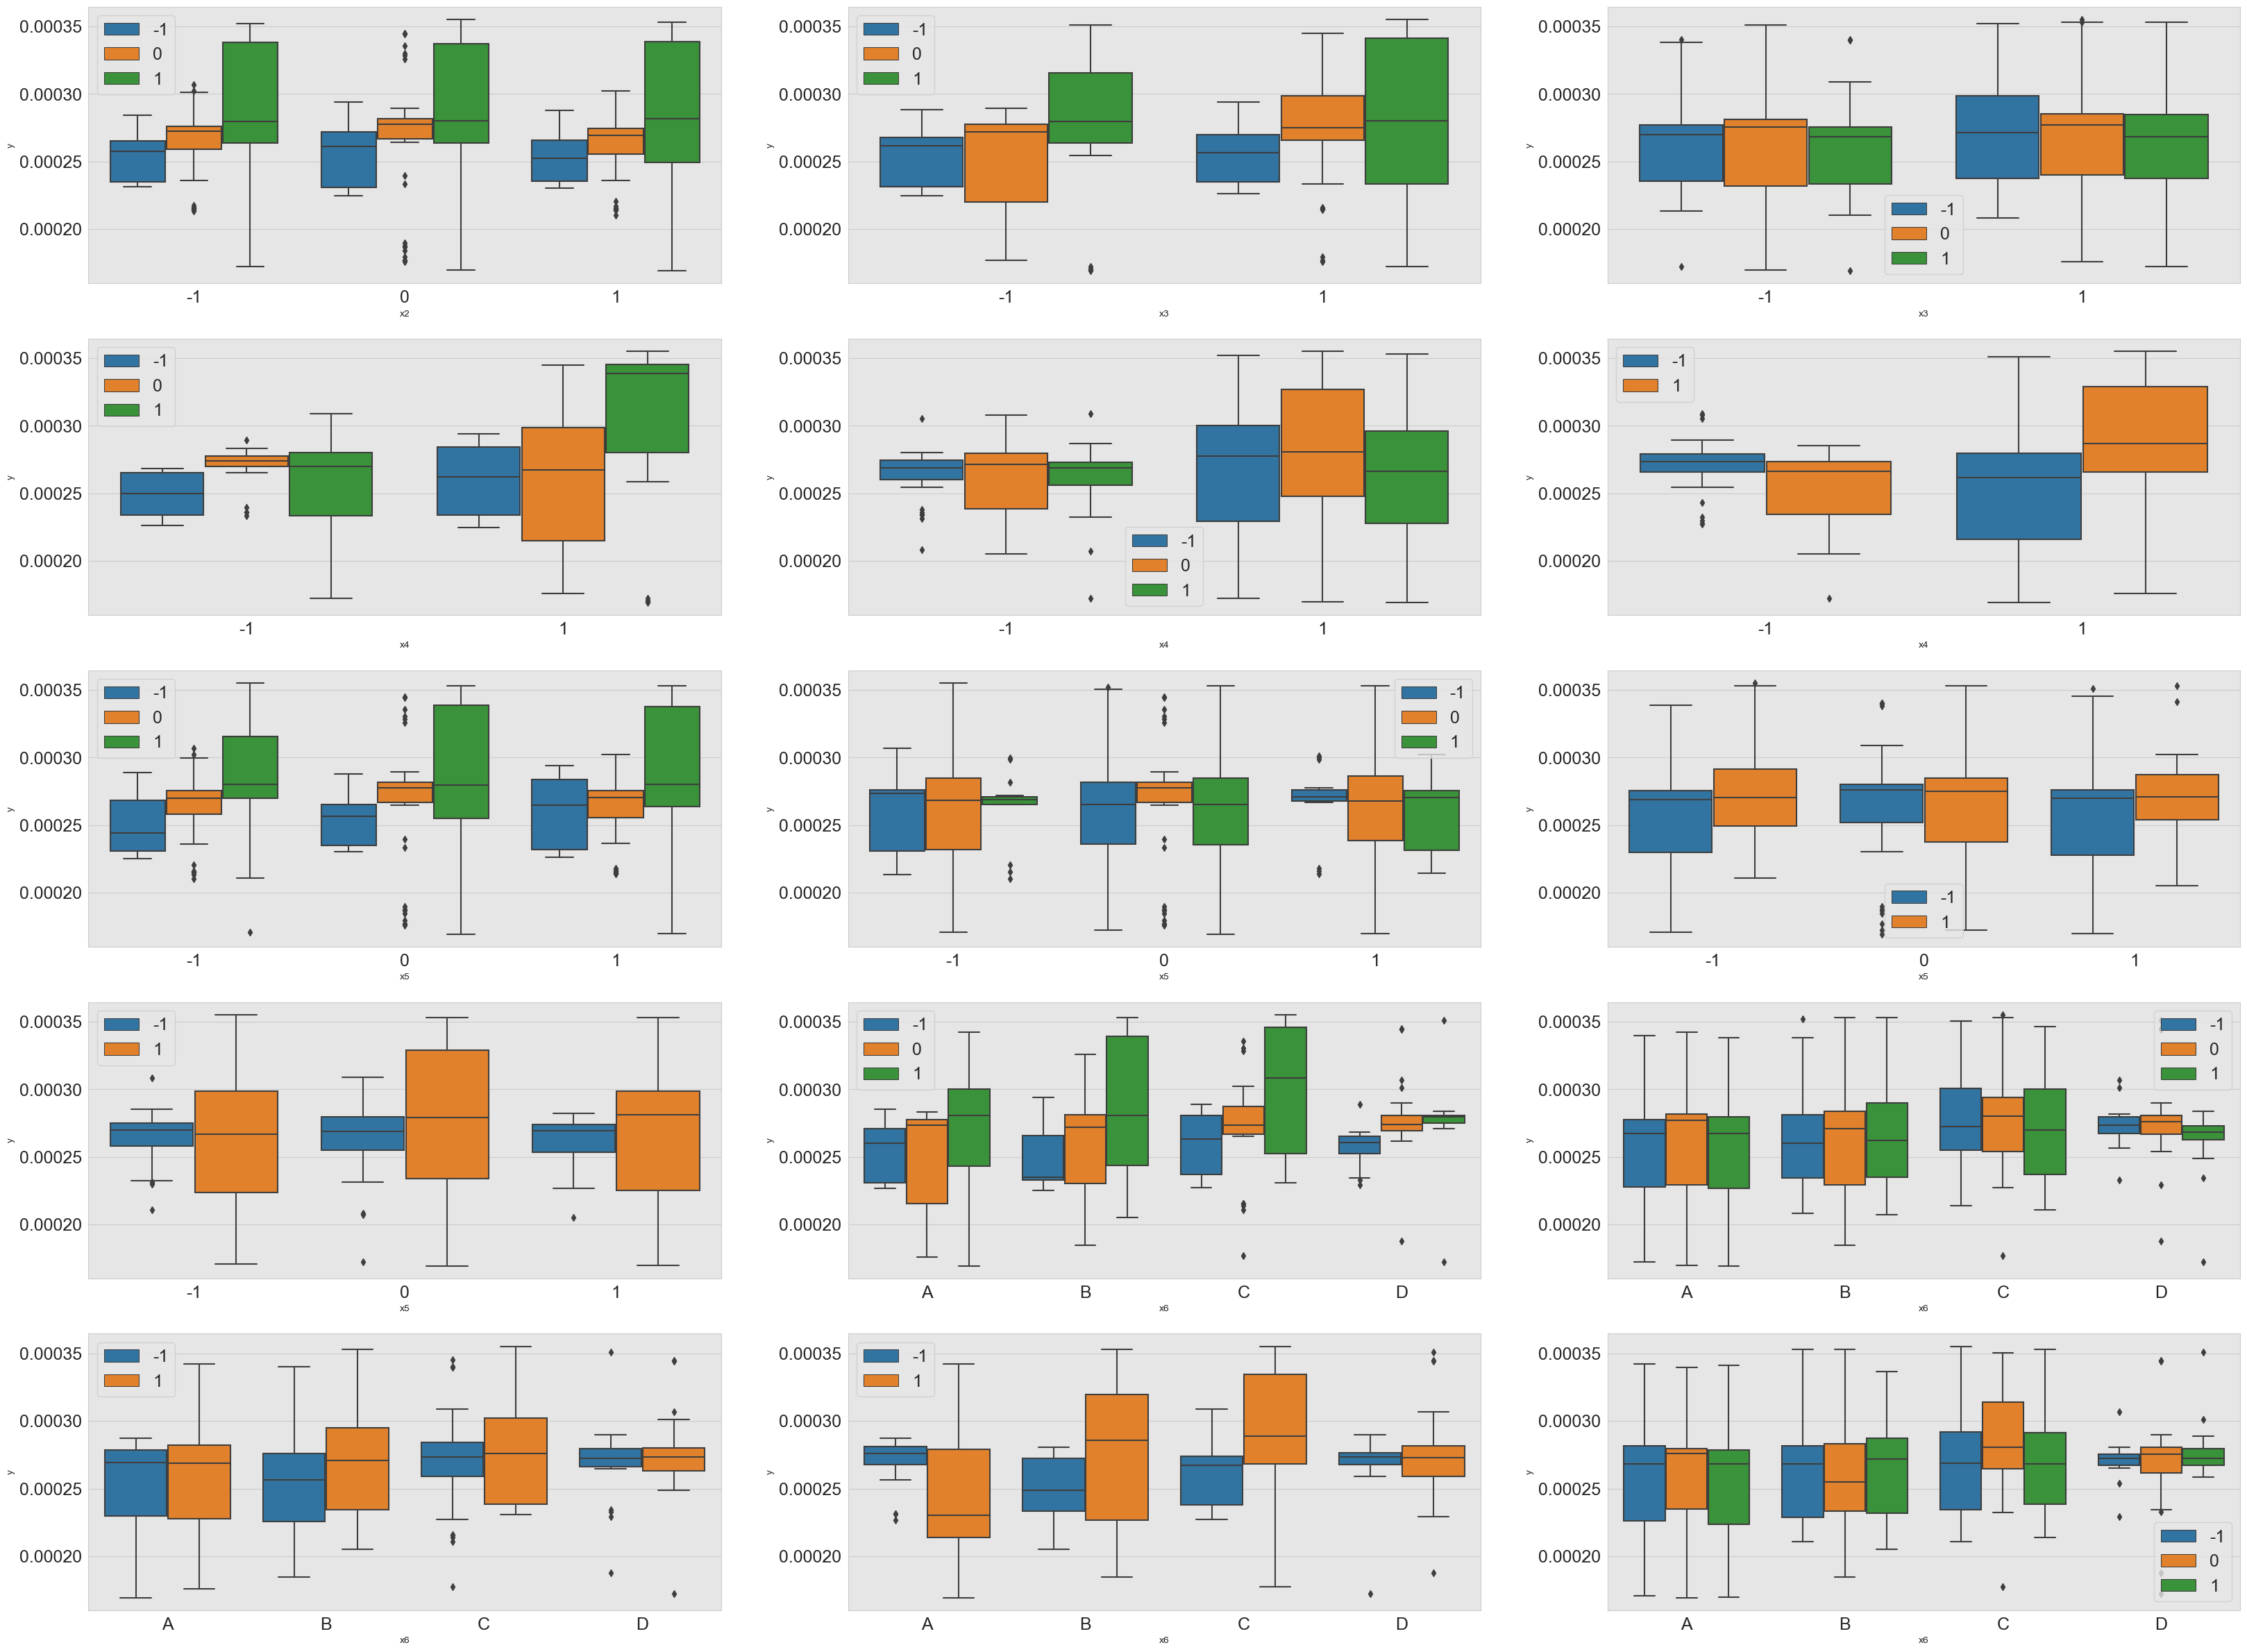

In [33]:
# categorical to continuous relationships grouped by a secondary categorical variable
fig, axs = plt.subplots(5,3,figsize=(40,30),sharex=False,sharey=False)

df_trial_copy = df_trial.copy()
df_trial_categorical_name_list = ['x1','x2','x3','x4','x5','x6']

df_trial_combination_list = [ (i,j) for i in df_trial_categorical_name_list for j in df_trial_categorical_name_list if i > j]

for i, combination in enumerate(df_trial_combination_list):
    sns.boxplot(data=df_trial_copy, x=combination[0], y='y', hue = combination[1],ax=axs[i//3][i%3])
    ## set font size
    axs[i//3][i%3].tick_params(labelsize=18)
    axs[i//3][i%3].legend(fontsize=18)


## Spefic requirements

In [20]:
## Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values.

## We don't have continuous inputs

In [21]:
## Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values.

## We don't have continuous inputs

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

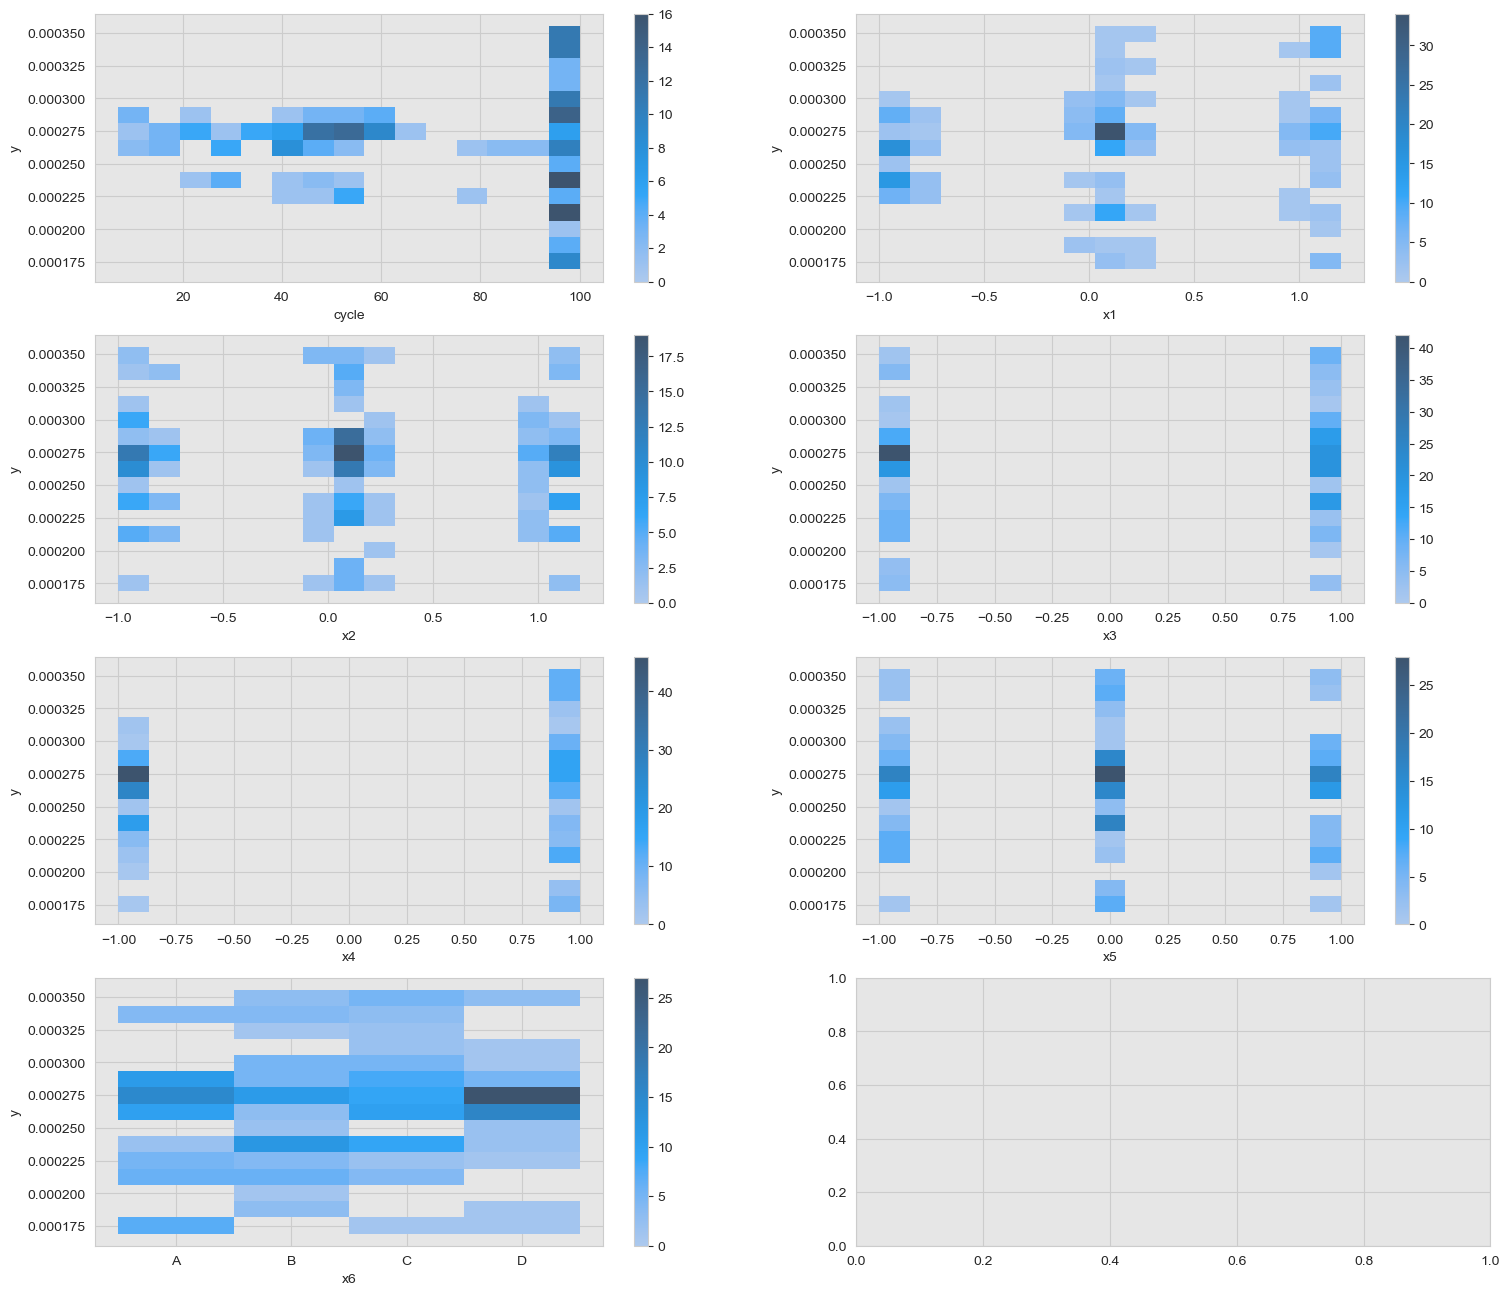

In [22]:
## Visualize the counts of combinations between the response (outcome) and categorical inputs

fig, ax = plt.subplots(4,2,figsize=(18,16),sharex=False,sharey=False)

df_trial_categorical_name_list = ['cycle','x1','x2','x3','x4','x5','x6']

for i, col in enumerate(df_trial_categorical_name_list):
    sns.histplot(data=df_trial_copy, x = col, y = 'y', bins = 15, ax=ax[i//2][i%2], multiple='dodge', shrink=.8, cbar=True)


# Part D) Cluster analysis
•	You must use KMeans to execute the Cluster analysis.
•	You must use PCA to support the cluster analysis visualizations.

•	First, use 2 clusters and:
•	Count the number of observations per identified cluster. Are the clusters balanced?
•	Visualize the cluster results between 2 of the variables used for the cluster analysis.
•	Visualize the cluster results using PCA. Is the visualization easier to interpret that the previous one?

•	Then, identify the optimal number of clusters, and rerun KMeans for the optimal number.
•	Count the number of observations per identified cluster.
•	Visualize the cluster results between 2 of the variables used for the cluster analysis.
•	Visualize the cluster results using PCA. Is the visualization easier to interpret that the previous
one?


•	Do the OPTIMAL number of clusters ALIGN with CATEGORIES of KNOWN grouping variables in your data?
•	If you are working on a classification problem, are the identified clusters consistent with the outcome categories?
•	If you are working on a regression problem, are the identified clusters consistent with categories of a categorical input?

•	What are the CONDITIONAL distributions of the variables you used for clustering GIVEN the identified clusters?
•	Use appropriate visualizations to study the CONDITIONAL distributions of the variables used for clustering GROUPED BY the identified clusters.
•	HINT: you are creating CONDITIONAL distributions using the DERIVED cluster
groupings rather than using a “real” categorical variable.
•	Describe the clusters based on the CONDITIONAL distributions.



c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

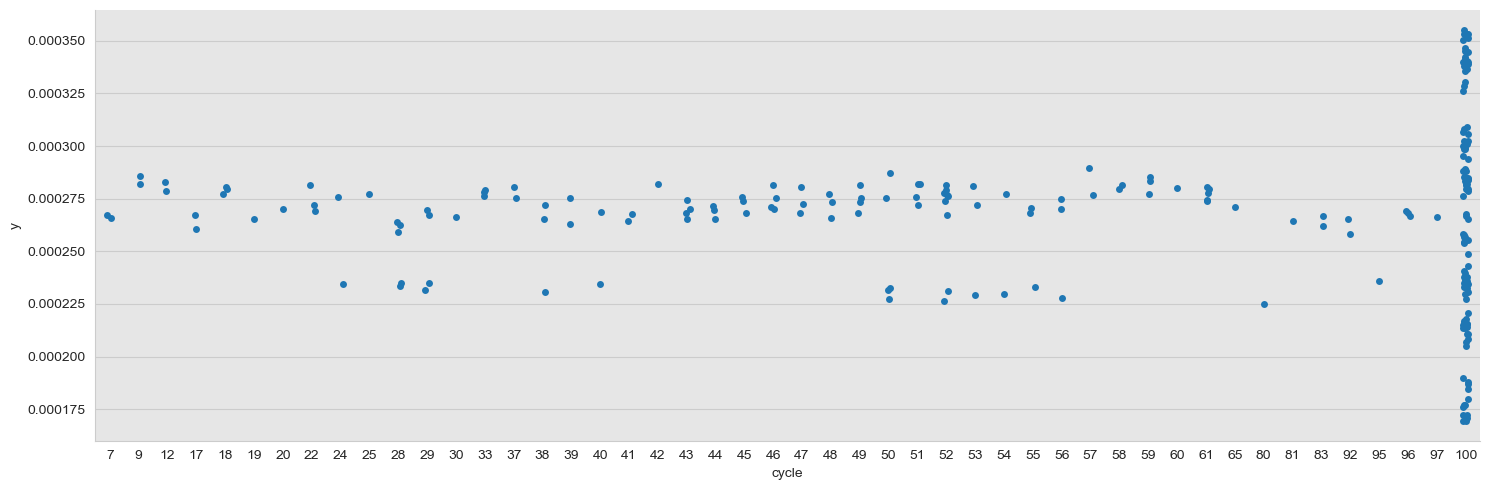

In [23]:
# Cluster using CONTINUOUS input

## We don't have continuous inputs

# Cluster using CONTINUOUS output

sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_trial_copy, y = 'y', x = 'cycle', kind='strip', height=5, aspect=3)


## Cluster using CONTINUOUS output

In [207]:
# using KMeans for clustering
from sklearn.cluster import KMeans

X = df_trial_copy.y.to_numpy().reshape(-1,1)
## KMeans clustering 2 clusters
km2 = KMeans(n_clusters=2,random_state=121,n_init=25,max_iter=500).fit(X)
df_trial_copy['k2'] = pd.Series(km2.predict(X), index = df_trial_copy.index)

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [208]:
df_trial_copy.k2.value_counts()

k2
0    172
1     68
Name: count, dtype: int64

The clusters are unbalanced.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

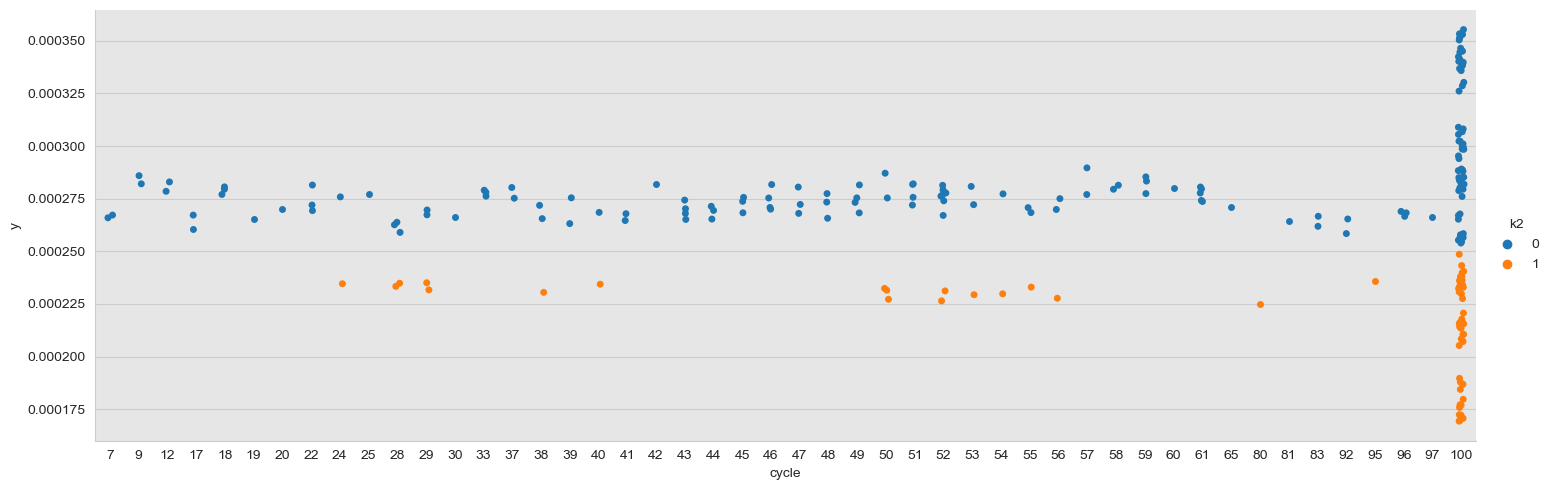

In [209]:
## visualize the cluster results 
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_trial_copy, y = 'y', x = 'cycle', kind='strip', height=5, aspect=3, hue='k2')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

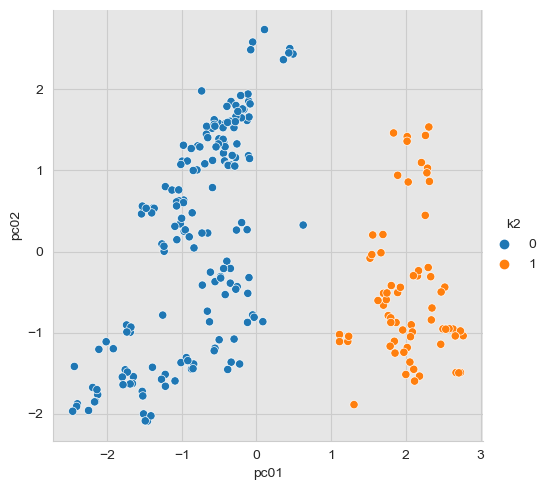

In [211]:
## PCA analysis
# After clean and standardization

from sklearn.preprocessing import StandardScaler
trial_clean = df_trial_copy.dropna().copy()
trial_clean_features = trial_clean.select_dtypes('number').copy()
X_trial = StandardScaler().fit_transform(trial_clean_features)

from sklearn.decomposition import PCA
pca_trial = PCA(n_components=2, random_state=121).fit(X_trial)
pca_trial_df = pd.DataFrame(pca_trial.transform(X_trial),columns=['pc01','pc02'])
pca_trial_df['k2'] = df_trial_copy.k2.astype('category')
sns.relplot(data=pca_trial_df, x = 'pc01', y = 'pc02', kind='scatter',hue = 'k2')

The visualization is relative more easy to interpret the relationship between variables.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMe

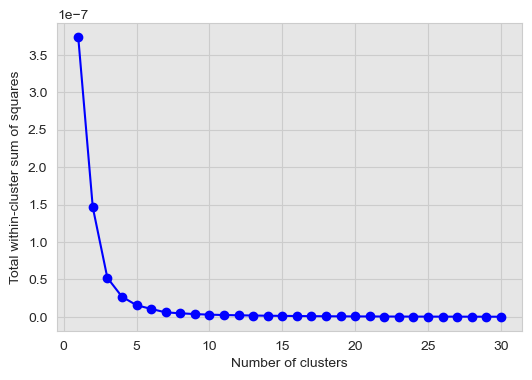

In [212]:
# Identify optimal number for clusters KMeans for clustering

tots_within = []

K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k,random_state=121,n_init=25,max_iter=500).fit(X)
    tots_within.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(K,tots_within,'bo-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Total within-cluster sum of squares')
plt.show()

It is a really large squrare value, however, it seems 4 or 5 clusters is acceptable.

In [213]:
## Using 4 cluster Kmeans for clustering
X = df_trial_copy.y.to_numpy().reshape(-1,1)
km4 = KMeans(n_clusters=4,random_state=121,n_init=25,max_iter=500).fit(X)
df_trial_copy['k4'] = pd.Series(km4.predict(X), index = df_trial_copy.index)
df_trial_copy.k4.value_counts()

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k4
0    147
1     55
2     25
3     13
Name: count, dtype: int64

We have 4 clusters, 147 in the first, 55 in the second, 25 in the third, 13 in the fourth.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

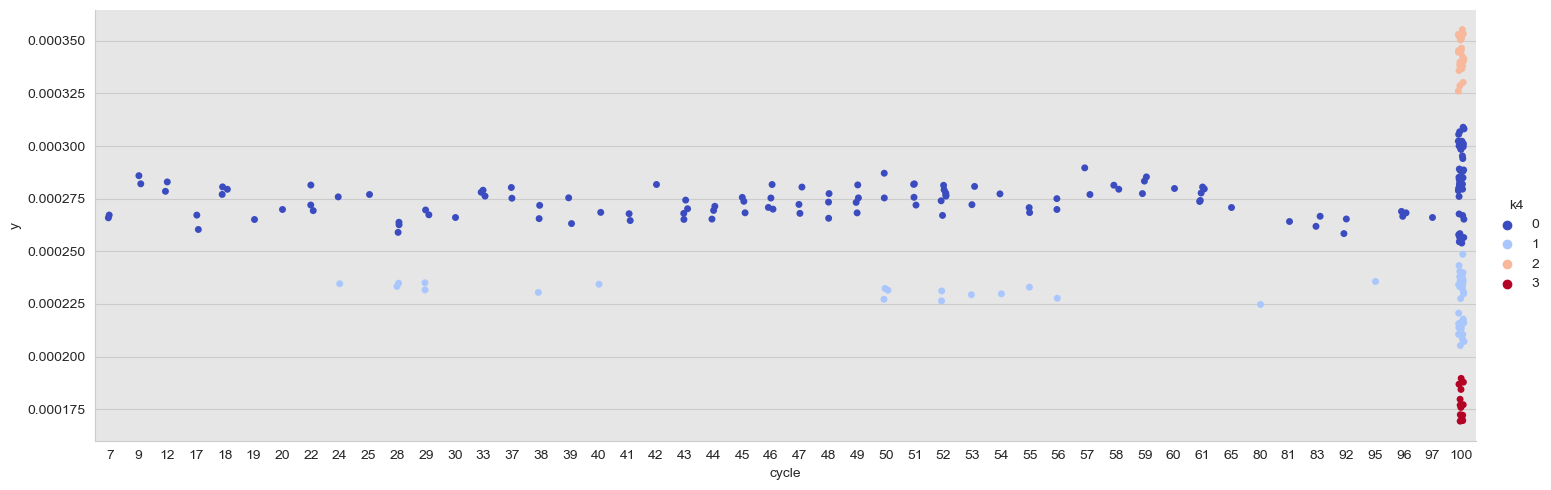

In [214]:
# visualize the new cluster results
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_trial_copy, y = 'y', x = 'cycle', kind='strip', height=5, aspect=3, hue='k4', palette='coolwarm')

In [215]:
## Further PCA analysis with updated number of clusters
# After clean and standardization
from sklearn.preprocessing import StandardScaler
trial_clean = df_trial_copy.dropna().copy()
trial_clean_features = trial_clean.select_dtypes('number').copy()
X_trial = StandardScaler().fit_transform(trial_clean_features)

from sklearn.decomposition import PCA
pca_trial = PCA(n_components=4, random_state=121).fit(X_trial)


In [216]:
pca_trial_df_2 = pd.DataFrame(pca_trial.transform(X_trial),columns=['pc01','pc02','pc03','pc04'])
pca_trial_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    240 non-null    float64
 1   pc02    240 non-null    float64
 2   pc03    240 non-null    float64
 3   pc04    240 non-null    float64
dtypes: float64(4)
memory usage: 7.6 KB


In [217]:
pca_trial_df_2['k4'] = df_trial_copy.k4.astype('category')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

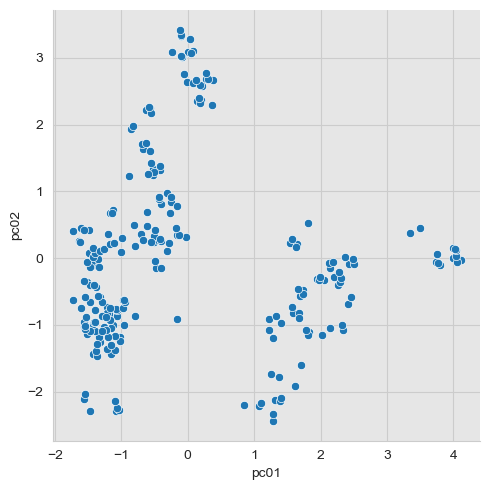

In [218]:
sns.relplot(data=pca_trial_df_2, x = 'pc01', y = 'pc02', kind='scatter')

,trial_id,x1,x2,x3,x4,x5,x6,cycle,y,k2,k4,pc01,pc02,pc03,pc04,k4
0,1,-1,-1,-1,-1,0,A,39,0.000263,0,0,-1.077451,-2.284276,-0.640583,0.304401,0
1,2,1,-1,-1,-1,0,A,52,0.000279,0,0,-1.193852,-0.816847,-2.464400,0.379649,0
2,3,-1,1,-1,-1,0,A,38,0.000266,0,0,-1.028388,-2.272330,-0.537050,0.245949,0
3,4,1,1,-1,-1,0,A,50,0.000287,0,0,-1.217940,-0.757005,-2.370557,0.331694,0
4,5,-1,0,-1,-1,-1,A,40,0.000268,0,0,-1.070028,-2.241636,-0.588945,0.301155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,-1,1,1,1,D,100,0.000301,0,0,-0.829612,1.971665,1.457434,-0.391260,0
236,237,0,1,1,1,1,D,83,0.000262,0,0,-0.507293,1.282113,1.688843,-0.375433,0
237,238,0,0,1,1,0,D,100,0.000345,0,2,-0.090811,3.010575,1.079199,-0.063495,2
238,239,0,0,1,1,0,D,100,0.000345,0,2,-0.098860,3.020913,1.086729,-0.061143,2


c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

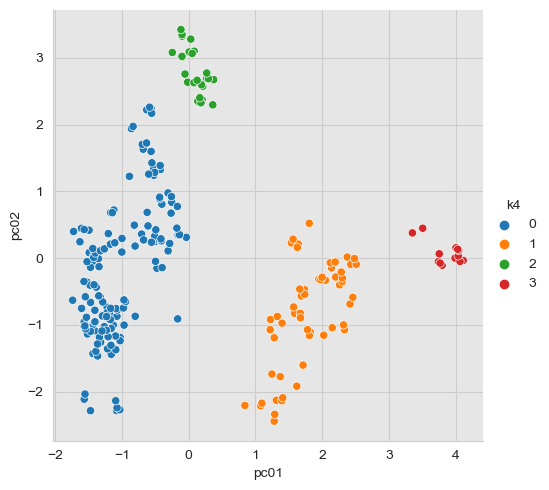

In [222]:
sns.relplot(data=pca_trial_df_2, x = 'pc01', y = 'pc02', kind='scatter',hue = 'k4')

No, it is not easy to interpret the relationship between variables.

### Do the OPTIMAL number of clusters ALIGN with CATEGORIES of KNOWN grouping variables in your data?

No, the optimal number of clusters does not align with categories of known grouping variables in the data.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

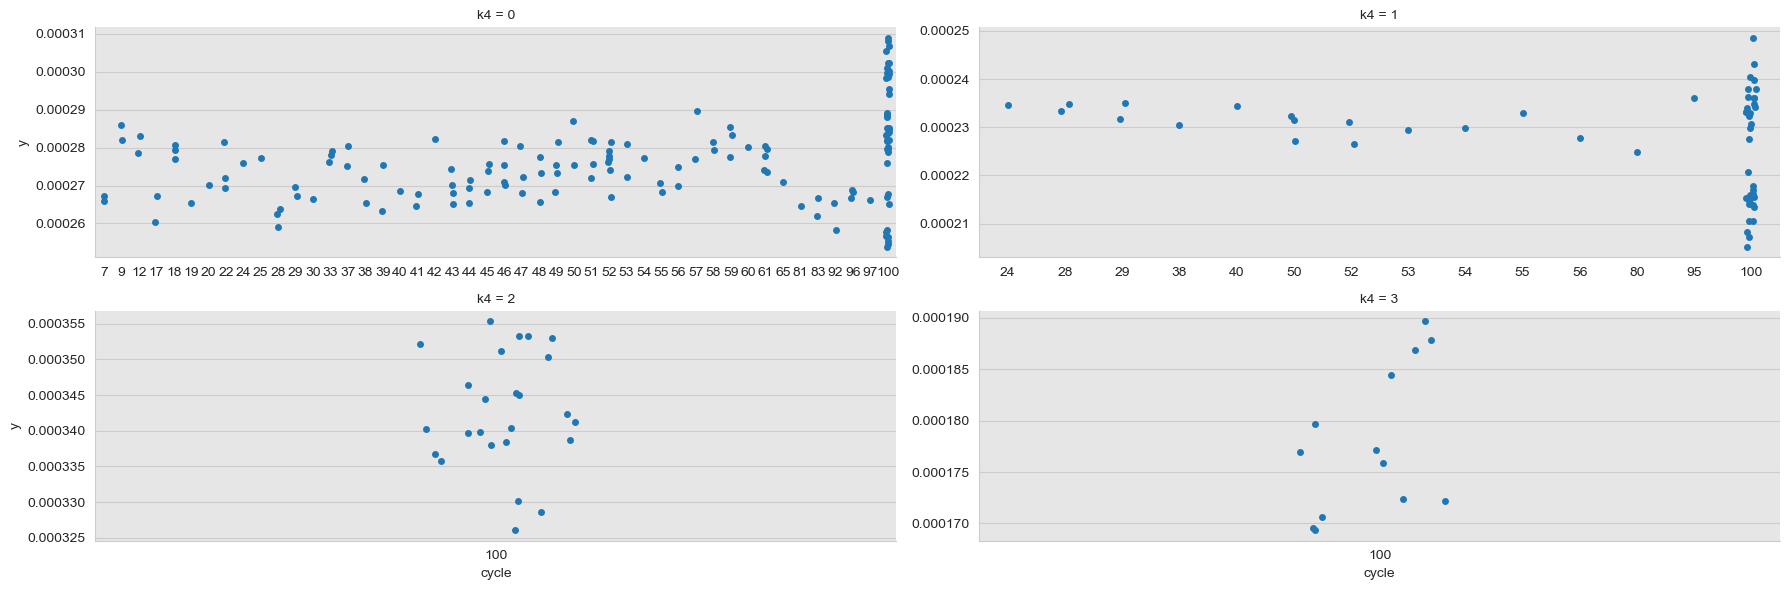

In [230]:
## CONDITIONAL distributions of the variables in the PCA space

sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_trial_copy, y = 'y', x = 'cycle', kind='strip', height=3, aspect=3, col='k4', col_wrap=2, sharex=False, sharey=False)

Some max cycle results are not seperated from the others. 

## Cluster using multiple summary statistics Count value derived from inputs.

In [148]:
## KMeans clustering 2 clusters


df_trial_copy = df_trial.copy()
df_cluster_input_sample = df_trial_copy.groupby(['x1','x2','x3']).size().reset_index(name='num_rows')

X = df_cluster_input_sample[['num_rows']].to_numpy().reshape(-1,1)
km2 = KMeans(n_clusters=2,random_state=121,n_init=25,max_iter=500).fit(X)

df_cluster_input_sample['k2'] = pd.Series(km2.predict(X), index = df_cluster_input_sample.index)

df_cluster_input_sample.k2.value_counts()

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k2
0    10
1     8
Name: count, dtype: int64

It is relative balanced.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

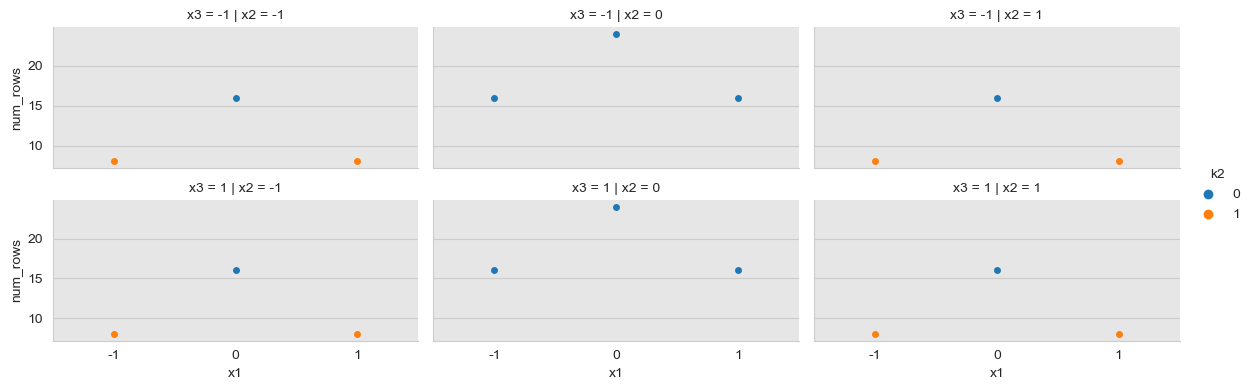

In [154]:
## visualize the cluster results
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_cluster_input_sample, y = 'num_rows', x = 'x1',col = 'x2', row = 'x3', kind='strip', height=2, aspect=2, hue='k2')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

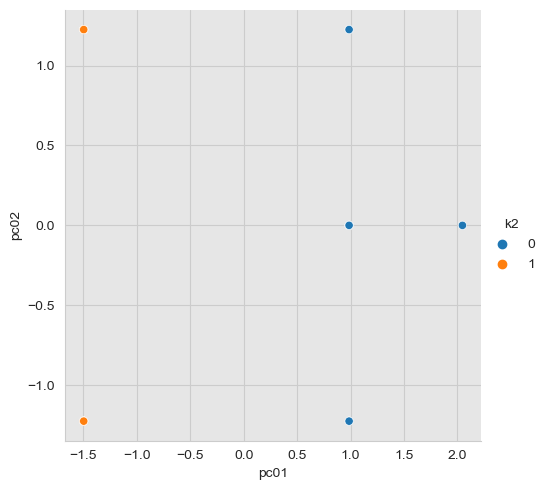

In [155]:
## PCA analysis
# After clean and standardization

from sklearn.preprocessing import StandardScaler
trial_clean = df_cluster_input_sample.dropna().copy()
trial_clean_features = trial_clean.select_dtypes('number').copy()
X_trial = StandardScaler().fit_transform(trial_clean_features)

from sklearn.decomposition import PCA
pca_trial = PCA(n_components=2, random_state=121).fit(X_trial)

pca_trial_df = pd.DataFrame(pca_trial.transform(X_trial),columns=['pc01','pc02'])

pca_trial_df['k2'] = df_cluster_input_sample.k2.astype('category')
sns.relplot(data=pca_trial_df, x = 'pc01', y = 'pc02', kind='scatter',hue = 'k2')

The visualization is relative more easy to interpret the relationship between variables.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMe

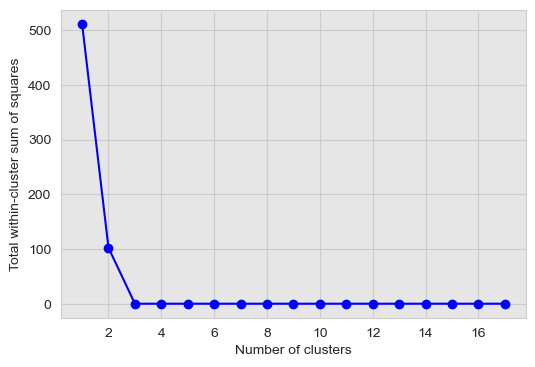

In [161]:
# Identify optimal number for clusters KMeans for clustering
df_trial_copy = df_trial.copy()

df_cluster_input_sample = df_trial_copy.groupby(['x1','x2','x3']).size().reset_index(name='num_rows')

# using KMeans for clustering
from sklearn.cluster import KMeans
X = df_cluster_input_sample.num_rows.to_numpy().reshape(-1,1)

tots_within = []

K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k,random_state=121,n_init=25,max_iter=500).fit(X)
    tots_within.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(K,tots_within,'bo-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Total within-cluster sum of squares')
plt.show()

3 Cluster would lead to zero squares

In [183]:
## KMeans clustering
km3 = KMeans(n_clusters=3,random_state=121,n_init=25,max_iter=500).fit(X)
df_cluster_input_sample['k3'] = pd.Series(km3.predict(X), index = df_cluster_input_sample.index)
df_cluster_input_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   x1        18 non-null     int64
 1   x2        18 non-null     int64
 2   x3        18 non-null     int64
 3   num_rows  18 non-null     int64
 4   k3        18 non-null     int32
dtypes: int32(1), int64(4)
memory usage: 776.0 bytes


c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [181]:
df_cluster_input_sample.k3.value_counts()

k3
1    8
0    8
2    2
Name: count, dtype: int64

We have 3 clusters, 8 in the first, 8 in the second and 2 in the third.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

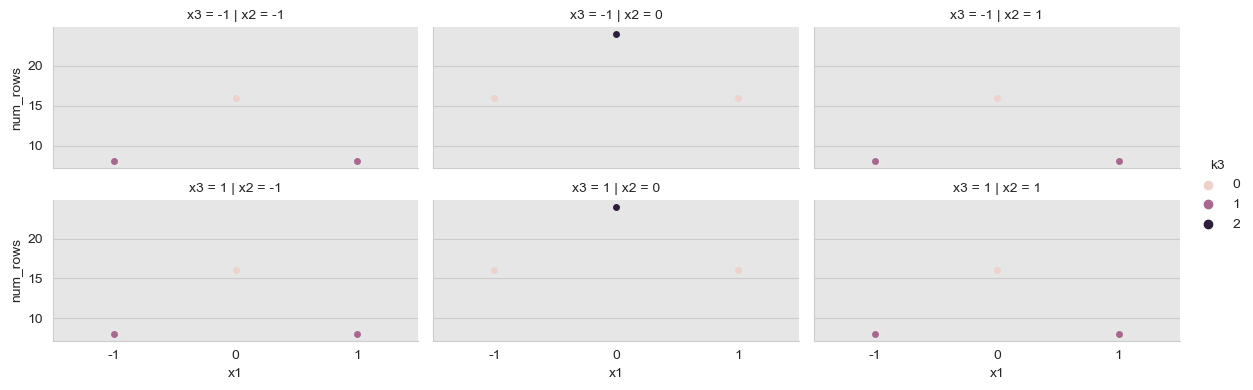

In [175]:
# visualize the new cluster results
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_cluster_input_sample, y = 'num_rows', x = 'x1', col = 'x2', row = 'x3', kind='strip', height=2, aspect=2, hue='k3')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

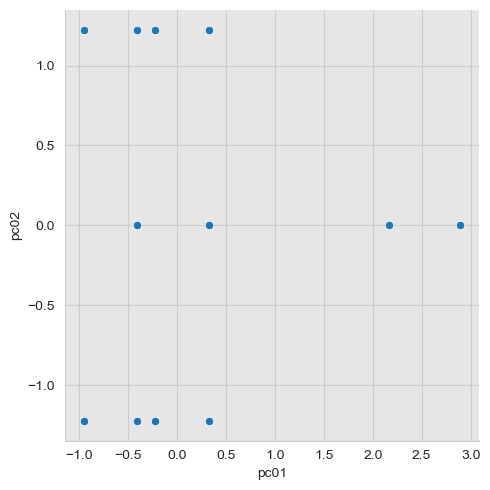

In [184]:
## Further PCA analysis with updated number of clusters
# After clean and standardization
from sklearn.preprocessing import StandardScaler
trial_clean = df_cluster_input_sample.dropna().copy()
trial_clean_features = trial_clean.select_dtypes('number').copy()
X_trial = StandardScaler().fit_transform(trial_clean_features)

from sklearn.decomposition import PCA
pca_trial = PCA(n_components=3, random_state=121).fit(X_trial)
pca_trial_df_2 = pd.DataFrame(pca_trial.transform(X_trial),columns=['pc01','pc02','pc03'])
pca_trial_df_2['k3'] = df_cluster_input_sample.k3.astype('category')
sns.relplot(data=pca_trial_df_2, x = 'pc01', y = 'pc02', kind='scatter')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

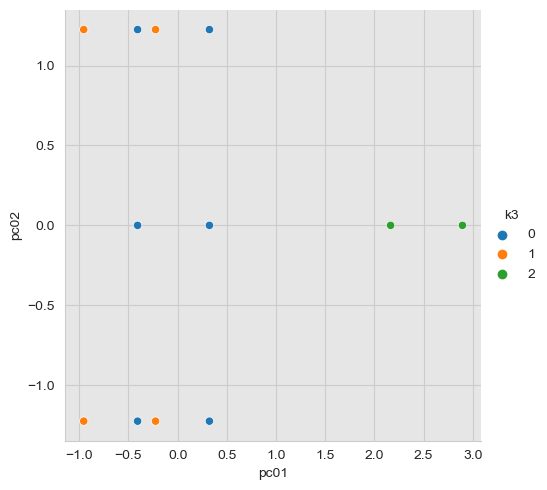

In [185]:
sns.relplot(data=pca_trial_df_2, x = 'pc01', y = 'pc02', kind='scatter',hue = 'k3')

No, it is not easy to interpret the relationship between variables.

### Do the OPTIMAL number of clusters ALIGN with CATEGORIES of KNOWN grouping variables in your data?

No, the optimal number of clusters does not align with categories of known grouping variables in the data.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

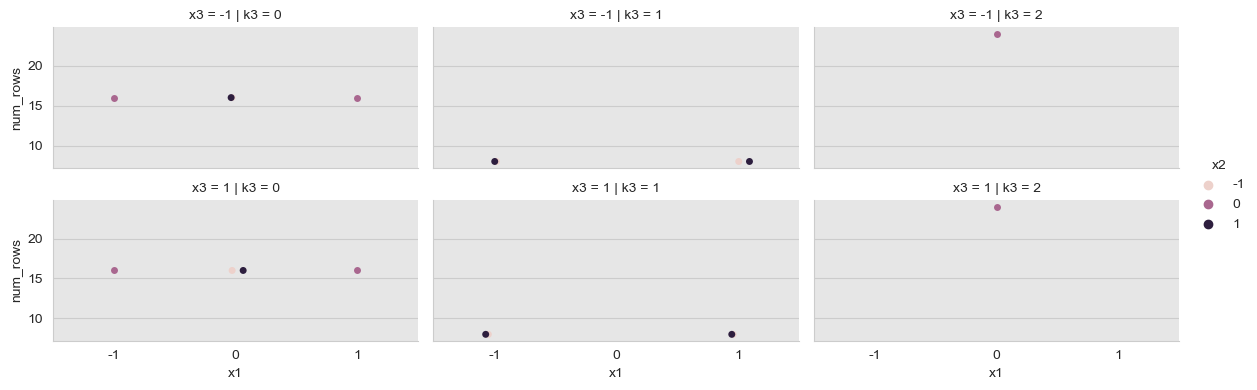

In [232]:
## CONDITIONAL distributions of the variables in the PCA space

sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_cluster_input_sample, y = 'num_rows', x = 'x1', hue = 'x2', col = 'k3', row = 'x3', kind='strip', height=2, aspect=2)

Given x3 = ±1, and x2 = 0, and x1 = 1, we would have the max number of input parameters. This reveals potential unbalanced data input problem.

## Cluster using multiple summary statistics MEDIAN derived from the outputs

In [186]:
df_trial_copy = df_trial.copy()

df_cluster_output_sample = df_trial_copy.groupby(['cycle']).agg({'y':['mean','std','min','max','median','count']}).reset_index()
df_cluster_output_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (cycle, )    48 non-null     int64  
 1   (y, mean)    48 non-null     float64
 2   (y, std)     37 non-null     float64
 3   (y, min)     48 non-null     float64
 4   (y, max)     48 non-null     float64
 5   (y, median)  48 non-null     float64
 6   (y, count)   48 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 2.8 KB


In [189]:
## using KMeans for clustering by SUMMARY STATISTICS MEDIAN
## KMeans clustering 2 clusters

X = df_cluster_output_sample.y['median'].to_numpy().reshape(-1,1)
km2 = KMeans(n_clusters=2,random_state=121,n_init=25,max_iter=500).fit(X)

df_cluster_output_sample['k2'] = pd.Series(km2.predict(X), index = df_cluster_output_sample.index)
df_cluster_output_sample.k2.value_counts()

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k2
0    41
1     7
Name: count, dtype: int64

It is not balanced.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

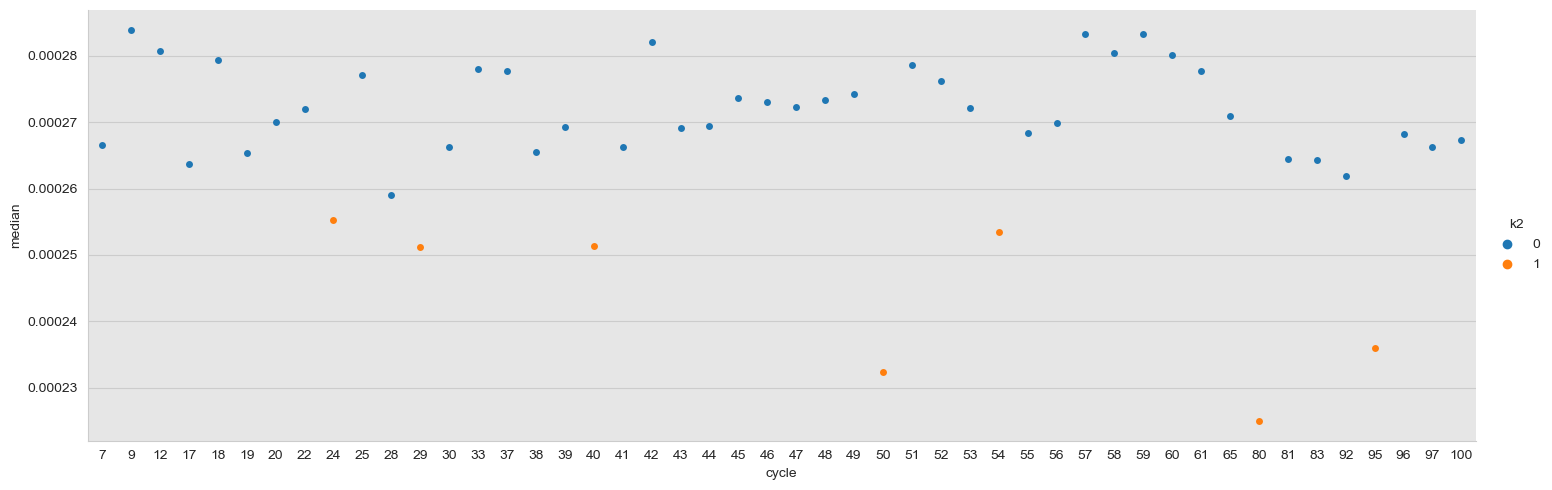

In [197]:
## visualize the cluster results
sns.set_style('whitegrid',{'axes.facecolor':'0.9'})


plot_y = df_cluster_output_sample.y['median']

sns.catplot(data = df_cluster_output_sample, x = 'cycle' ,y = plot_y, kind='strip', height=5, aspect=3, hue='k2')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

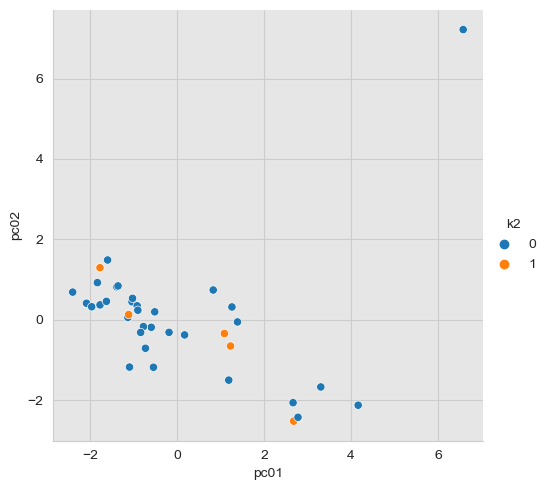

In [198]:
## PCA analysis
# After clean and standardization

from sklearn.preprocessing import StandardScaler
trial_clean = df_cluster_output_sample.dropna().copy()
trial_clean_features = trial_clean.select_dtypes('number').copy()
X_trial = StandardScaler().fit_transform(trial_clean_features)

from sklearn.decomposition import PCA
pca_trial = PCA(n_components=2, random_state=121).fit(X_trial)

pca_trial_df = pd.DataFrame(pca_trial.transform(X_trial),columns=['pc01','pc02'])

pca_trial_df['k2'] = df_cluster_output_sample.k2.astype('category')
sns.relplot(data=pca_trial_df, x = 'pc01', y = 'pc02', kind='scatter',hue = 'k2')

It is not easy to interpret the relationship between variables.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMe

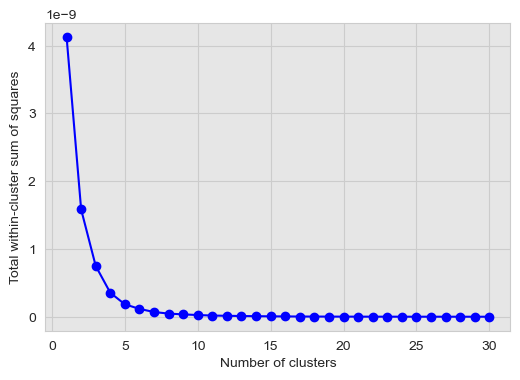

In [86]:
## Identify optimal number for clusters KMeans for clustering by SUMMARY STATISTICS MEDIAN
df_cluster_output_sample_clean = df_cluster_output_sample.dropna()
from sklearn.cluster import KMeans
X = df_cluster_output_sample_clean.y['median'].to_numpy().reshape(-1,1)

tots_within = []

K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k,random_state=121,n_init=25,max_iter=500).fit(X)
    tots_within.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(K,tots_within,'bo-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Total within-cluster sum of squares')
plt.show()

Cluster by median, it is a good choice to cluster by 3 or 4 groups

In [87]:
## KMeans clustering
km4 = KMeans(n_clusters=4,random_state=121,n_init=25,max_iter=500).fit(X)
df_cluster_output_sample_clean['k4'] = pd.Series(km4.predict(X), index = df_cluster_output_sample_clean.index)
df_cluster_output_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 47
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (cycle, )    37 non-null     int64  
 1   (y, mean)    37 non-null     float64
 2   (y, std)     37 non-null     float64
 3   (y, min)     37 non-null     float64
 4   (y, max)     37 non-null     float64
 5   (y, median)  37 non-null     float64
 6   (y, count)   37 non-null     int64  
 7   (k4, )       37 non-null     int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 2.5 KB


c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sopuser\AppData\Local\Temp\ipykernel_49212\989760767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_output_sample_clean['k4'] = pd.Series(km4.predict(X), index = df_cluster_output_sample_clean.index)


In [88]:
df_cluster_output_sample_clean.k4.value_counts()

k4
2    19
0    11
1     6
3     1
Name: count, dtype: int64

We have 4 clusters, 19 in the first, 11 in the second, 6 in the third and 1 in the fourth.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

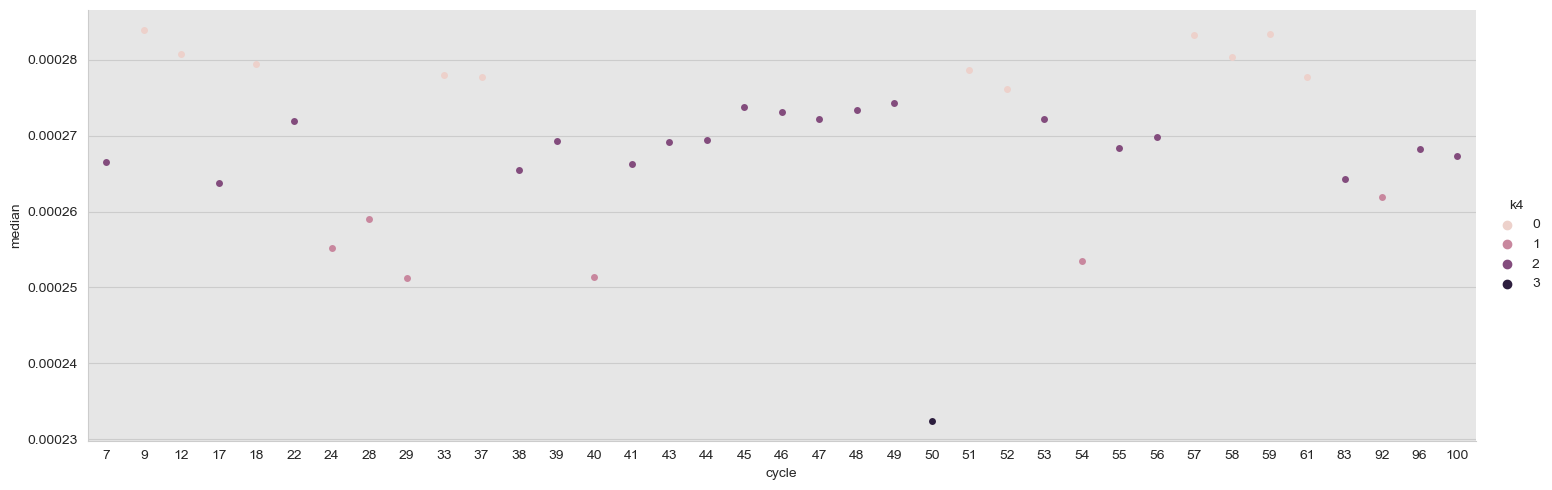

In [200]:
# visualize the relationships between the median and y values using histograms


sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
plot_x = df_cluster_output_sample_clean.y['median']

sns.catplot(data = df_cluster_output_sample_clean, x = 'cycle' ,y = plot_x, kind='strip', height=5, aspect=3, hue='k4')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

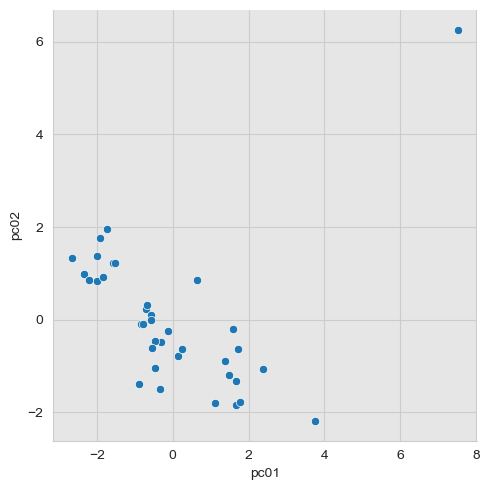

In [201]:
## Further PCA analysis with updated number of clusters
# After clean and standardization
from sklearn.preprocessing import StandardScaler
trial_clean = df_cluster_output_sample_clean.dropna().copy()
trial_clean_features = trial_clean.select_dtypes('number').copy()
X_trial = StandardScaler().fit_transform(trial_clean_features)

from sklearn.decomposition import PCA
pca_trial = PCA(n_components=3, random_state=121).fit(X_trial)
pca_trial_df_2 = pd.DataFrame(pca_trial.transform(X_trial),columns=['pc01','pc02','pc03'])
pca_trial_df_2['k4'] = df_cluster_output_sample_clean.k4.astype('category')
sns.relplot(data=pca_trial_df_2, x = 'pc01', y = 'pc02', kind='scatter')

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

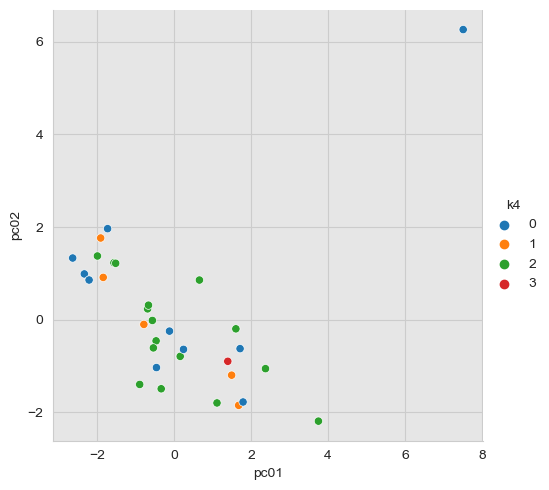

In [202]:
sns.relplot(data=pca_trial_df_2, x = 'pc01', y = 'pc02', kind='scatter',hue = 'k4')

No, it is no easy to interpret the relationship between variables.

### Do the OPTIMAL number of clusters ALIGN with CATEGORIES of KNOWN grouping variables in your data?

No, the optimal number of clusters does not align with categories of known grouping variables in the data.

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

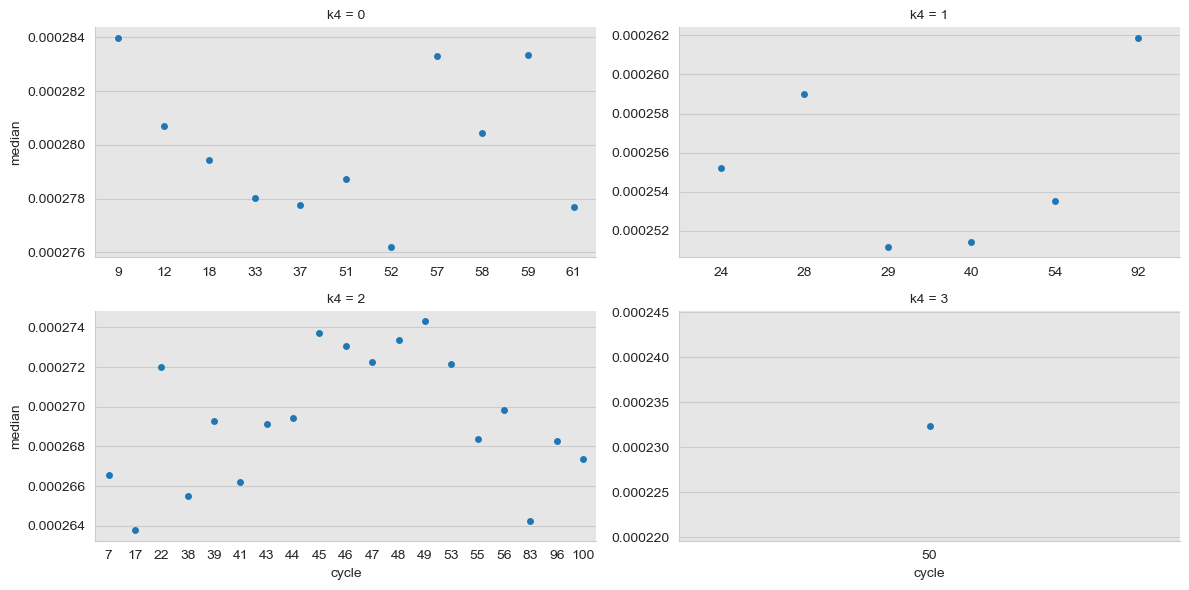

In [236]:
## CONDITIONAL distributions of the variables in the PCA space

sns.set_style('whitegrid',{'axes.facecolor':'0.9'})
sns.catplot(data = df_cluster_output_sample_clean, x = 'cycle' ,y = plot_x, kind='strip', height=3, aspect=2, col='k4', col_wrap=2, sharex=False, sharey=False)

This suggest that if the max cycle number reaches 100, the median value would lie in the range of 0.000264 to 0.000274.